<div class="alert alert-block alert-info">
    <h3>Student Information for <u>Group 106</u></h3><br>
<b>Name</b>: Shashwat Singh<br>
<b>NetID</b>: ss2823<br>
<b>Recitation</b>: Thursday (Section 02) <br><br><b>Name</b>: Michelle R Dry-Moran<br>
<b>NetID</b>: mdry<br>
<b>Recitation</b>: Tuesday (Section 01)<br><br>

</div>

In [1]:
#Setup
import pandas as pd
import zipfile
import seaborn as sns

In [2]:
#install altair
!pip install altair
import altair as alt 

### ---------------------------------
# DATA COLLECTION
### ---------------------------------

<div class="alert alert-block alert-info">
<h3>#1. Data Collection</h3><br>
    <i>Describe the source of your data or provide details of how you collected the data.</i><br>
<b>-----------------------------------------------------</b><br>
<b>Source of Data:</b><br>
Data was collected by performing a google search for "NBA data sets" and finding some good data on Kaggle at the following sites:<br>
<a href="https://kaggle.com/nathanlauga/nba-games">https://kaggle.com/nathanlauga/nba-games </a><br>
<a href="https://www.kaggle.com/justinas/nba-players-data">https://www.kaggle.com/justinas/nba-players-data</a><br>
    The zip files <b>nba-players-data.zip</b> and <b>nba-games.zip</B> were downloaded and stored in the same file as the jupyter notebook.<br></div>

In [3]:
data_dir = 'data'
zip1 = 'nba-players-data.zip'
zip2 = 'nba-games.zip'

from zipfile import ZipFile
with ZipFile(zip1, 'r') as zipObj:
   # Extract all the contents of zip file in data_dir
   zipObj.extractall(data_dir)
    
with ZipFile(zip2, 'r') as zipObj2:
       # Extract all the contents of zip file in data_dir
        zipObj2.extractall(data_dir)
    

In [4]:
###### One way to import filenames
# from os import walk
# fileList = []
# for (dirpath, dirnames, filenames) in walk(data_dir):
#     fileList.extend(filenames)
#     break
# print(files)

In [5]:
# Look up only .csv files in data folder
from pathlib import Path
data_dir_path = Path('data') # creates a Path object that points to the data directory
file_names = [x.name for x in data_dir_path.glob('*.csv') if x.is_file()]
file_names

['teams.csv',
 'players.csv',
 'games.csv',
 'all_seasons.csv',
 'ranking.csv',
 'games_details.csv']

### ----------------------------------------------------------
# DATA FORMAT AND COLLECTION
### ----------------------------------------------------------

<div class="alert alert-block alert-info">
<h3>#2. Data Format and Collection</h3><br>
<i>Describe the format of your dataset in 1-2 paragraphs. E.g.: What files are included? What
is the file format / structure of the data? What are the most relevant attributes within each
    file and what do they mean?</i><br>   
<b>-----------------------------------------------------</b><br><br>
<div>
<b>Data Files</b><br><br>
There are five (5) csv data files collected from the zip file <b>nba-games.zip</b>. This dataset provides statistics on field goals, free throws, three pointers, assists, rebounds, and total points.  The csv data files in this set are as follows:
<ul>
<li><b>teams.csv</b>
    <ul>List of all NBA Teams</ul><br>
<li><b>players.csv</b>
    <ul>Player Details(i.e. team/season)</ul><br>
<li><b>games.csv</b>
    <ul>All games from the 2004 season to the last updated date (feb 2020) and some details like number of points, etc</ul><br> 
<li><b>ranking.csv</b>
    <ul>Ranking of NBA given a day (split into west and east on conference column</ul><br>
<li><b>games_details.csv</b>
    <ul>details of games dataset, all statistics of players for a given game</ul><br>
</ul>
</div>
<div>
    There is one (1) csv data file collected from the zip file <b>nba-players-data.zip</b>.  This dataset goes into more details on the individual players with statistics like age, height, weight, college, draft data, games played, and the standard box score statistics. The csv data file in this set is as follows:
<ul>
<li><b>all_seasons.csv</b>
    <ul>contains all player data from the 1996 to 2019 seasons</ul><br>
</ul>

</div>

<div class="alert alert-block alert-info">
<b>Most Relevant Attributes</b><br><br>
From our poposal, we hoped to analyze the following questions:
<ul>
<li>How are today’s players attributes different from their predecessors?  (age, height, weight)
<li>How likely is a player to make a free throw?  (Does home court vs away change the data?
<li>How likely is a player to make a three pointer?  (Does home court vs away change the data?
<li>Do players take more shots at home or away?
<li>Do players foul or get fouled more often home or away?
<li>Is a center’s performance on rebounding better, worse, or the same at home court/away?
<li>Are players with good three-point accuracy similarly effective at the free throw line and vice versa?
<li>What parts of the game are least important to success? (teams that win despite having low 3 pts, assists, rebounds etc.)
<li>Are teams that are reliant on star players consistently able to perform? (see games where the player is out/injured
<li>What team(s) will make it to the NBA playoffs/finals?
</ul>    

The attributes that will be most relevant to our proposal questions are the following (See cells below for more info on definitions/type of all attributes):
<ul>
<li><b>teams.csv</b>
    <ul>Since this data is relative to the team (i.e. Manager/Owner/Stadium), it really does not have any attributes that are relevant to our questions</ul><br>
<li><b>players.csv</b>
    <ul>The player spreadsheet may be useful for determining how many seasons a player played for and on what team they played on, so potentially all attributes could be used from this document: <b>PLAYER_NAME</b> (name of player), <b>TEAM_ID</b> (ID of team), <b>PLAYER_ID</b> (player ID), <b>SEASON</b> (season they played - so there are multiple lines per player)</ul><br>
<li><b>games.csv</b>
    <ul>This dataset would be helpful to help address the parts of a game that are least important/most important to success, and potentially can be paired with some of the other csv files to see if when the team wins, is it because they have a start player.  Some of the relevant attributes are: <b>GAME_ID</b> (ID of the game), <b>HOME_TEAM_ID</b> (ID of home team), <b>VISITOR_TEAM_ID</b> (ID of visitor team), <b>SEASON</b> (season of game), <b>PTS_home</b> (# of points scored by home team), <b>FG_PCT_home</b> (field Goal % (efficiency) for home team), <b>FT_PCT_home</b> (free throw % of home team), <b>FG3_PCT_home</b> (three point % of home team), <b>AST_home</b> (assists of home team), <b>REB_home</b> (rebounds of home team), <b>PTS_away</b> (# of points scored by away team), <b>FG_PCT_away</b> (field goal % (efficiency) for away team), <b>FT_PCT_away</b> (free throw % of away team), <b>FG3_PCT_away</b> (three point % of away team), <b>AST_away</b> (assists of away team, <b>REB_away</b> (rebounds of away team), <b>HOME_TEAM_WINS</b> (binary - if home team won the game).</ul><br> 
<li><b>ranking.csv</b>
    <ul>This dataset would be helpful to see the winning % over time for a team, using the following attributes: <b>TEAM_ID</b> (ID of the team), 
<b>SEASON_ID</b> (Season), <b>STANDINGSDATE</b> (Standings date), <b>TEAM</b> (Team name), and <b>W_PCT</b> (Win %).</ul><br>
<li><b>games_details.csv</b>
    <ul>This dataset would be good for finding out how likely a player will make a three throw, a three pointer, and other statistics for game details.  You can also see how long a player stays in the game (i.e. does the team rely on this player).  Some of the key attributes are: <b>GAME_ID</b> (ID of the game), <b>TEAM_ID</b> (ID of the team), <b>TEAM_ABBREVIATION</b> (Team's abbreviation), <b>PLAYER_ID</b> (ID of the player), <b>PLAYER_NAME</b> (Player's name), <b>START_POSITION</b> (Position of the player), <b>MIN</b> (Minutes played), <b>FGM</b> (Field Goals Made), <b>FGA</b> (Field Goals Attempted), <b>FG_PCT</b> (Field Goal Percentage), <b>FG3M</b> (Three Pointers Made), <b>FG3A</b> (Three Pointers Attempted), <b>FG3_PCT</b> (Three Point Percentage), <b>FTM</b> (Free Throws Made
<b>FTA</b> (Free Throws Attempted), <b>FT_PCT</b> (Free Throw Percentage), <b>OREB</b> (Offensive Rebounds), <b>DREB</b> (Defensive Rebounds), <b>REB</b> (Rebounds), <b>AST</b> (Assists), <b>STL</b> (Steals), <b>BLK</b> (Blocked shots), <b>TO</b> (Turnovers), <b>PF</b> (Personnal Foul), <b>PTS</b> (Number of points scored by the player).
</ul><br>
<li><b>all_seasons.csv</b>
    <ul>Since this dataset (csv doc) is disjunct from the previous datasets, we cannot go by ID #s, and cannot guarantee that names will identically match from this dataset to the other dataset.  Therefore, this dataset will mostly be used to answer how players differed from past to present.  The attributes that are most relevant are <b>player_name</b> (name of the player), <b>age</b> (age of the player), <b>player_height</b> (height in centimeters of the player), <b>player_weight</b> (weight in kilograms of player), <b>gp</b> (# of games played throughout season), <b>pts</b> (average number of points scored), <b>reb</b> (average number of rebounds grabbed), <b>ast</b> (average number of assists distributed), <b>season</b> (NBA season). There are other metrics to use in this dataset; however we are focusing on these.</ul><br>
</ul>

</div>

### Investigating Each File / Describing Attributes 

In [6]:
from utils import head

#check out file: teams.csv
head('data/teams.csv')

['LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION\n',
 '00,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks\n',
 '00,1610612738,1946,2019,BOS,Celtics,1946,Boston,TD Garden,18624,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws\n',
 '00,1610612740,2002,2019,NOP,Pelicans,2002,New Orleans,Smoothie King Center,,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate\n',
 '00,1610612741,1966,2019,CHI,Bulls,1966,Chicago,United Center,21711,Jerry Reinsdorf,Gar Forman,Jim Boylen,Windy City Bulls\n']

<div class="alert alert-block alert-info">
    <h3>File: <u>teams.csv</u></h3><br>
    This csv file <i>(from nba-games.zip)</i> contains the following fields:
    <ul>
    <li><u>LEAGUE_ID</u>
        <ul><b>Type:</b> Number (key)</ul>
        <ul><b>Description:</b> ID # of the league (which for this data is only NBA)</ul>
        <ul><b>Example:</b> 00</ul><br>
    <li><u>TEAM_ID</u>
        <ul><b>Type:</b> Number (key)</ul>
        <ul><b>Description:</b> ID of the Team</ul>
        <ul><b>Example:</b> 1610612737</ul><br>
    <li><u>MIN_YEAR</u>
        <ul><b>Type:</b> 4 digit number (for year)</ul>
        <ul><b>Description:</b> Minimum year of the team into the NBA championship</ul>
        <ul><b>Example:</b> 1949</ul><br>
    <li><u>MAX_YEAR</u>
        <ul><b>Type:</b> 4 digit number (for year)</ul>
        <ul><b>Description:</b> Maximum year of the team into NBA championship </ul>
        <ul><b>Example:</b> 2019</ul><br>
    <li><u>ABBREVIATION</u>
        <ul><b>Type:</b> 3 Capital Chars (Categorical)</ul>
        <ul><b>Description:</b> Abbreviation of the team</ul>
        <ul><b>Example:</b> ATL</ul><br>
    <li><u>NICKNAME</u>
        <ul><b>Type:</b> String</ul>
        <ul><b>Description:</b> Teams Nickname</ul>
        <ul><b>Example:</b> Hawks</ul><br>
    <li><u>YEARFOUNDED</u>
        <ul><b>Type:</b> 4 digit number (for year)</ul>
        <ul><b>Description:</b> Year team was founded</ul>
        <ul><b>Example:</b> 1949</ul><br>
    <li><u>CITY</u>
        <ul><b>Type:</b> String </ul>
        <ul><b>Description:</b> Team's City</ul>
        <ul><b>Example:</b> Atlanta</ul><br>
    <li><u>ARENA</u>
        <ul><b>Type:</b> String</ul>
        <ul><b>Description:</b> Team's Stadium</ul>
        <ul><b>Example:</b> State Farm Arena</ul><br>
    <li><u>ARENACAPACITY</u>
        <ul><b>Type:</b> Number (int)</ul>
        <ul><b>Description:</b> Capacity of the Stadium</ul>
        <ul><b>Example:</b> 18729</ul><br>
    <li><u>OWNER</u>
        <ul><b>Type:</b> String</ul>
        <ul><b>Description:</b> Owner of the Team (the last owner)</ul>
        <ul><b>Example:</b> Tony Ressler</ul><br>
    <li><u>GENERALMANAGER</u>
        <ul><b>Type:</b> String</ul>
        <ul><b>Description:</b> General Manager</ul>
        <ul><b>Example:</b> Travis Schlenk</ul><br>
    <li><u>HEADCOACH</u>
        <ul><b>Type:</b> String</ul>
        <ul><b>Description:</b> Head Coach</ul>
        <ul><b>Example:</b> Lloyd Pierce</ul><br>
    <li><u>DLEAGUEAFFILIATION</u>
        <ul><b>Type:</b> String</ul>
        <ul><b>Description:</b> League Affiliation</ul>
        <ul><b>Example:</b> Erie Bayhawks</ul>
</ul>
</div>

In [7]:
# check out file: players.csv
head('data/players.csv')

['PLAYER_NAME,TEAM_ID,PLAYER_ID,SEASON\n',
 "Royce O'Neale,1610612762,1626220,2019\n",
 'Bojan Bogdanovic,1610612762,202711,2019\n',
 'Rudy Gobert,1610612762,203497,2019\n',
 'Donovan Mitchell,1610612762,1628378,2019\n']

<div class="alert alert-block alert-info">
<h3>File: <u>players.csv</u></h3><br>
This csv file <i>(from nba-games.zip)</i> contains the following fields:
<ul>
    <li><u>PLAYER_NAME</u>
        <ul><b>Type:</b> String</ul>
        <ul><b>Description:</b> Players Name</ul>
        <ul><b>Example:</b> Royce O'Neale</ul><br>
    <li><u>TEAM_ID</u>
        <ul><b>Type:</b> number (key)</ul>
        <ul><b>Description:</b> ID of the team</ul>
        <ul><b>Example:</b> 1610612762</ul><br>
    <li><u>PLAYER_ID</u>
        <ul><b>Type:</b> number (key)</ul>
        <ul><b>Description:</b> ID of the player</ul>
        <ul><b>Example:</b> 1626220</ul><br>
    <li><u>SEASON</u>
        <ul><b>Type:</b> 4 digit number (for year)</ul>
        <ul><b>Description:</b> Season</ul>
        <ul><b>Example:</b> 2019</ul>
    
</ul>
</div>

In [8]:
#check out file: games.csv
head('data/games.csv')

['GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS\n',
 '2020-03-01,21900895,Final,1610612766,1610612749,2019,1610612766,85,0.354,0.9,0.229,22,47,1610612749,93,0.402,0.762,0.226,20,61,0\n',
 '2020-03-01,21900896,Final,1610612750,1610612742,2019,1610612750,91,0.364,0.4,0.31,19,57,1610612742,111,0.468,0.632,0.275,28,56,0\n',
 '2020-03-01,21900897,Final,1610612746,1610612755,2019,1610612746,136,0.592,0.805,0.542,25,37,1610612755,130,0.505,0.65,0.488,27,37,1\n',
 '2020-03-01,21900898,Final,1610612743,1610612761,2019,1610612743,133,0.566,0.7,0.5,38,41,1610612761,118,0.461,0.897,0.263,24,36,1\n']

<div class="alert alert-block alert-info">
<h3>File: <u>games.csv</u></h3><br>
This csv file <i>(from nba-games.zip)</i> contains the following fields:
<ul>
    <li><u>GAME_DATE_EST</u>
        <ul><b>Type:</b> Date</ul>
        <ul><b>Description:</b> Game's date</ul>
        <ul><b>Example:</b> 2020-03-01</ul><br>
    <li><u>GAME_ID</u>
        <ul><b>Type:</b> Number (Key)</ul>
        <ul><b>Description:</b> ID of the game</ul>
        <ul><b>Example:</b> 21900895</ul><br>
    <li><u>GAME_STATUS_TEXT</u>
        <ul><b>Type:</b> String (Categorical)</ul>
        <ul><b>Description:</b> Status : Final means that the game is completed
</ul>
        <ul><b>Example:</b> Final</ul><br>
    <li><u>HOME_TEAM_ID</u>
        <ul><b>Type:</b> Number (Key)</ul>
        <ul><b>Description:</b> ID of the home team</ul>
        <ul><b>Example:</b> 1610612766</ul><br>
    <li><u>VISITOR_TEAM_ID</u>
        <ul><b>Type:</b> Number (key)</ul>
        <ul><b>Description:</b> ID of the visitor team</ul>
        <ul><b>Example:</b> 1610612749</ul><br>
    <li><u>SEASON</u>
        <ul><b>Type:</b> 4 digit number (for year)</ul>
        <ul><b>Description:</b> Season when the game occurred</ul>
        <ul><b>Example:</b> 2019</ul><br>
    <li><u>TEAM_ID_home</u>
        <ul><b>Type:</b> Number</ul>
        <ul><b>Description:</b> ID of the home team (duplicate of HOME_TEAM_ID)</ul>
        <ul><b>Example:</b> 1610612766</ul><br>
    <li><u>PTS_home</u>
        <ul><b>Type:</b> Number (int)</ul>
        <ul><b>Description:</b> Number of points scored by home team</ul>
        <ul><b>Example:</b>85</ul><br>
    <li><u>FG_PCT_home</u>
        <ul><b>Type:</b> Number (float)</ul>
        <ul><b>Description:</b> Field Goal Percentage home team</ul>
        <ul><b>Example:</b> 0.354</ul><br>
    <li><u>FT_PCT_home</u>
        <ul><b>Type:</b> Number (float)</ul>
        <ul><b>Description:</b> Free Throw Percentage of the home team</ul>
        <ul><b>Example:</b> 0.9</ul><br>
    <li><u>FG3_PCT_home</u>
        <ul><b>Type:</b> Number (float)</ul>
        <ul><b>Description:</b> Three Point Percentage of the home team</ul>
        <ul><b>Example:</b> 0.229</ul><br>
    <li><u>AST_home</u>
        <ul><b>Type:</b> Number (int)</ul>
        <ul><b>Description:</b> Assists of the home team</ul>
        <ul><b>Example:</b> 22</ul><br>
    <li><u>REB_home</u>
        <ul><b>Type:</b> Number (int)</ul>
        <ul><b>Description:</b> Rebounds of the home team</ul>
        <ul><b>Example:</b> 47</ul><br>
    <li><u>TEAM_ID_away</u>
        <ul><b>Type:</b> Number (int)</ul>
        <ul><b>Description:</b> ID of the away team (duplicate of VISITOR_TEAM_ID)</ul>
        <ul><b>Example:</b> 1610612749</ul><br>
    <li><u>PTS_away</u>
        <ul><b>Type:</b> Number (int)</ul>
        <ul><b>Description:</b> Number of points scored by away team</ul>
        <ul><b>Example:</b> 93</ul><br>
    <li><u>FG_PCT_away</u>
        <ul><b>Type:</b> Number (float)</ul>
        <ul><b>Description:</b> Field Goal Percentage away team</ul>
        <ul><b>Example:</b> 0.402</ul><br>
    <li><u>FT_PCT_away</u>
        <ul><b>Type:</b> Number (float)</ul>
        <ul><b>Description:</b> Free Throw Percentage of the away team</ul>
        <ul><b>Example:</b> 0.762</ul><br>
    <li><u>FG3_PCT_away</u>
        <ul><b>Type:</b> Number (float)</ul>
        <ul><b>Description:</b> Three Point Percentage of the away team</ul>
        <ul><b>Example:</b> 0.226</ul><br>
    <li><u>AST_away</u>
        <ul><b>Type:</b> Number (int)</ul>
        <ul><b>Description:</b> Assists of the away team</ul>
        <ul><b>Example:</b> 20</ul><br>
    <li><u>REB_away</u>
        <ul><b>Type:</b> Number (int)</ul>
        <ul><b>Description:</b> Rebounds of the away team</ul>
        <ul><b>Example:</b> 61</ul><br>
    <li><u>HOME_TEAM_WINS</u>
        <ul><b>Type:</b> Number (int)</ul>
        <ul><b>Description:</b> If home team won the game</ul>
        <ul><b>Example:</b> 0</ul>     
</ul>
</div>

In [9]:
# check out file: ranking.csv
head('data/ranking.csv')

['TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD\n',
 '1610612747,00,22019,2020-03-01,West,L.A. Lakers,59,46,13,0.78,21-7,25-6\n',
 '1610612743,00,22019,2020-03-01,West,Denver,60,41,19,0.683,24-7,17-12\n',
 '1610612746,00,22019,2020-03-01,West,LA Clippers,60,41,19,0.683,25-6,16-13\n',
 '1610612745,00,22019,2020-03-01,West,Houston,59,39,20,0.661,21-8,18-12\n']

<div class="alert alert-block alert-info">
<h3>File: <u> ranking.csv</u></h3><br>
This csv file <i>(from nba-games.zip)</i> contains the following fields:
<ul>
    <li><u>TEAM_ID</u>
        <ul><b>Type:</b> Number (key)</ul>
        <ul><b>Description:</b> ID of the team</ul>
        <ul><b>Example:</b> 1610612747</ul><br>
    <li><u>LEAGUE_ID</u>
        <ul><b>Type:</b> Number (key)</ul>
        <ul><b>Description:</b> ID of the league (here only NBA)</ul>
        <ul><b>Example:</b> 00</ul><br>
    <li><u>SEASON_ID</u>
        <ul><b>Type:</b> Number (key)</ul>
        <ul><b>Description:</b> Season</ul>
        <ul><b>Example:</b> 22019</ul><br>
    <li><u>STANDINGSDATE</u>
        <ul><b>Type:</b> Date</ul>
        <ul><b>Description:</b> Standings date</ul>
        <ul><b>Example:</b> 2020-03-01</ul><br>
    <li><u>CONFERENCE</u>
        <ul><b>Type:</b> String (Categorical)</ul>
        <ul><b>Description:</b> Conference (west or east)</ul>
        <ul><b>Example:</b> West</ul><br>
    <li><u>TEAM</u>
        <ul><b>Type:</b> String (Categorical)</ul>
        <ul><b>Description:</b> Team name</ul>
        <ul><b>Example:</b> L.A. Lakers</ul><br>
    <li><u>G</u>
        <ul><b>Type:</b> Number (int)</ul>
        <ul><b>Description:</b> Number of games played on the season</ul>
        <ul><b>Example:</b> 59</ul><br>
    <li><u>W</u>
        <ul><b>Type:</b> Number (int)</ul>
        <ul><b>Description:</b> Number of winning games on the season</ul>
        <ul><b>Example:</b> 46</ul><br>
    <li><u>L</u>
        <ul><b>Type:</b> Number (int)</ul>
        <ul><b>Description:</b> Number of loosing games on the season</ul>
        <ul><b>Example:</b> 13</ul><br>
    <li><u>W_PCT</u>
        <ul><b>Type:</b> Number (float)</ul>
        <ul><b>Description:</b> Win percentage</ul>
        <ul><b>Example:</b> 0.78</ul><br>
    <li><u>HOME_RECORD</u>
        <ul><b>Type:</b> String</ul>
        <ul><b>Description:</b> Home record on the season</ul>
        <ul><b>Example:</b> 21-7</ul><br>
    <li><u>ROAD_RECORD</u>
        <ul><b>Type:</b> String</ul>
        <ul><b>Description:</b> Road record on the season</ul>
        <ul><b>Example:</b> 25-6</ul><br>
</ul>
</div>

In [10]:
# check out file: games_details.csv
head('data/games_details.csv')

['GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS\n',
 '21900895,1610612749,MIL,Milwaukee,202083,Wesley Matthews,F,,27:08,3.0,11.0,0.273,2.0,7.0,0.286,0.0,0.0,0.0,4.0,4.0,8.0,2.0,2.0,0.0,0.0,0.0,8.0,11.0\n',
 '21900895,1610612749,MIL,Milwaukee,203507,Giannis Antetokounmpo,F,,34:55,17.0,28.0,0.607,1.0,4.0,0.25,6.0,7.0,0.857,2.0,18.0,20.0,6.0,1.0,0.0,3.0,2.0,41.0,22.0\n',
 '21900895,1610612749,MIL,Milwaukee,201572,Brook Lopez,C,,26:25,4.0,11.0,0.364,1.0,5.0,0.2,7.0,9.0,0.778,2.0,5.0,7.0,0.0,0.0,3.0,0.0,2.0,16.0,16.0\n',
 '21900895,1610612749,MIL,Milwaukee,1628978,Donte DiVincenzo,G,,27:35,1.0,5.0,0.2,0.0,3.0,0.0,0.0,0.0,0.0,1.0,6.0,7.0,5.0,0.0,1.0,2.0,0.0,2.0,14.0\n']

<div class="alert alert-block alert-info">
<h3>File: <u> games_details.csv</u></h3><br>
This csv file <i>(from nba-games.zip)</i> contains the following fields:
<ul>
    <li><u>GAME_ID</u>
        <ul><b>Type:</b> Number (key)</ul>
        <ul><b>Description:</b> ID of the game</ul>
        <ul><b>Example:</b> 21900895</ul><br>
    <li><u>TEAM_ID m</u>
        <ul><b>Type:</b> Number (key)</ul>
        <ul><b>Description:</b> ID of the team</ul>
        <ul><b>Example:</b> 1610612749</ul><br>
    <li><u>TEAM_ABBREVIATION </u>
        <ul><b>Type:</b> String (3 letter Capital Chars)</ul>
        <ul><b>Description:</b> Team's abbreviation</ul>
        <ul><b>Example:</b> MIL</ul><br>
    <li><u>TEAM_CITY</u>
        <ul><b>Type:</b> String</ul>
        <ul><b>Description:</b> City where the game was played</ul>
        <ul><b>Example:</b> Milwaukee</ul><br>
    <li><u>PLAYER_ID </u>
        <ul><b>Type:</b> Number (key)</ul>
        <ul><b>Description:</b> ID of the player</ul>
        <ul><b>Example:</b> 202083</ul><br>
    <li><u>PLAYER_NAME</u>
        <ul><b>Type:</b> String</ul>
        <ul><b>Description:</b> Player's name</ul>
        <ul><b>Example:</b> Wesley Matthews</ul><br>
    <li><u>START_POSITION</u>
        <ul><b>Type:</b> Char (1 letter or nothing) (Categorical)</ul>
        <ul><b>Description:</b> Position of the player (if nothing then he's on the bench)</ul>
        <ul><b>Example:</b> F</ul><br>
    <li><u>COMMENT</u>
        <ul><b>Type:</b> String</ul>
        <ul><b>Description:</b> Comments</ul>
        <ul><b>Example:</b> No examples</ul><br>
    <li><u>MIN</u>
        <ul><b>Type:</b> String</ul>
        <ul><b>Description:</b> Minutes played</ul>
        <ul><b>Example:</b> 27:08</ul><br>
    <li><u>FGM</u>
        <ul><b>Type:</b> Number (float)</ul>
        <ul><b>Description:</b> Field Goals Made</ul>
        <ul><b>Example:</b> 3.0</ul><br>
    <li><u>FGA</u>
        <ul><b>Type:</b> Number (float)</ul>
        <ul><b>Description:</b> Field Goals Attempted</ul>
        <ul><b>Example:</b> 11.0</ul><br>
    <li><u>FG_PCT</u>
        <ul><b>Type:</b> Number (float)</ul>
        <ul><b>Description:</b> Field Goal Percentage</ul>
        <ul><b>Example:</b> 0.273</ul><br>
    <li><u>FG3M</u>
        <ul><b>Type:</b> Number (float)</ul>
        <ul><b>Description:</b> Three Pointers Made</ul>
        <ul><b>Example:</b> 2.0</ul><br>
    <li><u>FG3A</u>
        <ul><b>Type:</b> Number (float)</ul>
        <ul><b>Description:</b> Three Pointers Attempted</ul>
        <ul><b>Example:</b> 7.0</ul><br>
    <li><u>FG3_PCT</u>
        <ul><b>Type:</b> Number (float)</ul>
        <ul><b>Description:</b> Three Point Percentage</ul>
        <ul><b>Example:</b> 0.286</ul><br>
    <li><u>FTM</u>
        <ul><b>Type:</b> Number (float)</ul>
        <ul><b>Description:</b> Free Throws Made</ul>
        <ul><b>Example:</b> 0.0</ul><br>
    <li><u>FTA</u>
        <ul><b>Type:</b> Number (float)</ul>
        <ul><b>Description:</b> Free Throws Attempted</ul>
        <ul><b>Example:</b> 0.0</ul><br>
    <li><u>FT_PCT</u>
        <ul><b>Type:</b> Number (float)</ul>
        <ul><b>Description:</b> Free Throw Percentage</ul>
        <ul><b>Example:</b> 0.0</ul><br>
    <li><u>OREB</u>
        <ul><b>Type:</b> Number (float)</ul>
        <ul><b>Description:</b> Offensive Rebounds</ul>
        <ul><b>Example:</b> 4.0</ul><br>
    <li><u>DREB</u>
        <ul><b>Type:</b> Number (float)</ul>
        <ul><b>Description:</b> Defensive Rebounds</ul>
        <ul><b>Example:</b> 4.0</ul><br>
    <li><u>REB</u>
        <ul><b>Type:</b> Number (float)</ul>
        <ul><b>Description:</b> Rebounds</ul>
        <ul><b>Example:</b> 8.0</ul><br>
    <li><u>AST</u>
        <ul><b>Type:</b> Number (float)</ul>
        <ul><b>Description:</b> Assists</ul>
        <ul><b>Example:</b> 2.0</ul><br>
    <li><u>STL</u>
        <ul><b>Type:</b> Number (float)</ul>
        <ul><b>Description:</b> Steals</ul>
        <ul><b>Example:</b> 2.0</ul><br>
    <li><u>BLK</u>
        <ul><b>Type:</b> Number (float)</ul>
        <ul><b>Description:</b> Blocked shots</ul>
        <ul><b>Example:</b> 0.0</ul><br>
    <li><u>TO</u>
        <ul><b>Type:</b> Number (float)</ul>
        <ul><b>Description:</b> Turnovers</ul>
        <ul><b>Example:</b> 0.0</ul><br>
    <li><u>PF</u>
        <ul><b>Type:</b> Number (float)</ul>
        <ul><b>Description:</b> Personal Foul</ul>
        <ul><b>Example:</b> 0.0</ul><br>
    <li><u>PTS</u>
        <ul><b>Type:</b> Number (float)</ul>
        <ul><b>Description:</b> Number of points scored by the player</ul>
        <ul><b>Example:</b> 8.0</ul><br>
    <li><u>PLUS_MINUS</u>
        <ul><b>Type:</b> Number</ul>
        <ul><b>Description:</b> Plus - Minus</ul>
        <ul><b>Example:</b> 11.0</ul><br>
</ul>
</div>

In [11]:
# check out file: all_seasons.csv
head('data/all_seasons.csv')

[',player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season\n',
 '0,Dennis Rodman,CHI,36.0,198.12,99.79024,Southeastern Oklahoma State,USA,1986,2,27,55,5.7,16.1,3.1,16.1,0.18600000000000003,0.32299999999999995,0.1,0.479,0.113,1996-97\n',
 '1,Dwayne Schintzius,LAC,28.0,215.9,117.93392,Florida,USA,1990,1,24,15,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.43,0.048,1996-97\n',
 '2,Earl Cureton,TOR,39.0,205.74,95.25432,Detroit Mercy,USA,1979,3,58,9,0.8,1.0,0.4,-2.1,0.105,0.102,0.10300000000000001,0.376,0.14800000000000002,1996-97\n',
 "3,Ed O'Bannon,DAL,24.0,203.2,100.697424,UCLA,USA,1995,1,9,64,3.7,2.3,0.6,-8.7,0.06,0.149,0.16699999999999998,0.39899999999999997,0.077,1996-97\n"]

<div class="alert alert-block alert-info">
<h3>File: <u> all_seasons.csv</u></h3><br>
This csv file <i>(from nba-players-data.zip)</i> contains the following fields:
<ul>
    <li><u>' ' <i> Index</i></u>
        <ul><b>Type:</b> Number (int)</ul>
        <ul><b>Description:</b> The Index</ul>
        <ul><b>Example:</b> 0</ul><br>
    <li><u>player_name</u>
        <ul><b>Type:</b> String</ul>
        <ul><b>Description:</b> Name of the player</ul>
        <ul><b>Example:</b> Dennis Rodman</ul><br>
    <li><u>team_abbreviation</u>
        <ul><b>Type:</b> String (3 capital letters) (Categorical)</ul>
        <ul><b>Description:</b> Abbreviated name of the team the player played for (at the end of the season)</ul>
        <ul><b>Example:</b> CHI</ul><br>
    <li><u>age</u>
        <ul><b>Type:</b> Number (float)</ul>
        <ul><b>Description:</b> Age of the player</ul>
        <ul><b>Example:</b> 36.0</ul><br>
    <li><u>player_height</u>
        <ul><b>Type:</b> Number (float)</ul>
        <ul><b>Description:</b> Height of the player (in centimeters)</ul>
        <ul><b>Example:</b> 198.12</ul><br>
    <li><u>player_weight</u>
        <ul><b>Type:</b> Number (float)</ul>
        <ul><b>Description:</b> Weight of the player (in kilograms)</ul>
        <ul><b>Example:</b> 99.79024</ul><br>
    <li><u>college</u>
        <ul><b>Type:</b> String</ul>
        <ul><b>Description:</b> Name of the college the player attended</ul>
        <ul><b>Example:</b> Southeastern Oklahoma State</ul><br>
    <li><u>country</u>
        <ul><b>Type:</b> String (Categorical)</ul>
        <ul><b>Description:</b>  Name of the country the player was born in (not necessarily the nationality)</ul>
        <ul><b>Example:</b> USA</ul><br>
    <li><u>draft_year</u>
        <ul><b>Type:</b> String (but could be 4 digit #)</ul>
        <ul><b>Description:</b> The year the player was drafted</ul>
        <ul><b>Example:</b> 1986</ul><br>
    <li><u>draft_round</u>
        <ul><b>Type:</b> String (but could be number)</ul>
        <ul><b>Description:</b> The draft round the player was picked</ul>
        <ul><b>Example:</b> 2</ul><br>
    <li><u>draft_number</u>
        <ul><b>Type:</b> String (but could be number)</ul>
        <ul><b>Description:</b> The number at which the player was picked in his draft round</ul>
        <ul><b>Example:</b> 27</ul><br>
    <li><u>gp</u>
        <ul><b>Type:</b> Number (int)</ul>
        <ul><b>Description:</b> Games played throughout the season</ul>
        <ul><b>Example:</b> 55</ul><br>
    <li><u>pts</u>
        <ul><b>Type:</b> Number (float)</ul>
        <ul><b>Description:</b> Average number of points scored</ul>
        <ul><b>Example:</b> 5.7</ul><br>
    <li><u>reb</u>
        <ul><b>Type:</b> Number (float)</ul>
        <ul><b>Description:</b> Average number of rebounds grabbed</ul>
        <ul><b>Example:</b> 16.1</ul><br>
    <li><u>ast</u>
        <ul><b>Type:</b> Number (float)</ul>
        <ul><b>Description:</b> Average number of assists distributed</ul>
        <ul><b>Example:</b> 3.1</ul><br>
    <li><u>net_rating</u>
        <ul><b>Type:</b> Number (float)</ul>
        <ul><b>Description:</b> Team's point differential per 100 possessions while the player is on the court</ul>
        <ul><b>Example:</b> 16.1</ul><br>
    <li><u>oreb_pct</u>
        <ul><b>Type:</b> Number (float)</ul>
        <ul><b>Description:</b> Percentage of available offensive rebounds the player grabbed while he was on the floor</ul>
        <ul><b>Example:</b> 0.18600000000000003</ul><br>
    <li><u>dreb_pct</u>
        <ul><b>Type:</b> Number (float)</ul>
        <ul><b>Description:</b> Percentage of available defensive rebounds the player grabbed while he was on the floor</ul>
        <ul><b>Example:</b> 0.32299999999999995</ul><br>
    <li><u>usg_pct</u>
        <ul><b>Type:</b> Number (float)</ul>
        <ul><b>Description:</b> Percentage of team plays used by the player while he was on the floor (FGA + Possession Ending FTA + TO) / POSS)</ul>
        <ul><b>Example:</b> 0.1</ul><br>
    <li><u>ts_pct</u>
        <ul><b>Type:</b> Number (float)</ul>
        <ul><b>Description:</b> Measure of the player's shooting efficiency that takes into account free throws, 2 and 3 point shots (PTS / (2*(FGA + 0.44 * FTA)))</ul>
        <ul><b>Example:</b> 0.479</ul><br>
    <li><u>ast_pct</u>
        <ul><b>Type:</b> Number (float)</ul>
        <ul><b>Description:</b> Percentage of teammate field goals the player assisted while he was on the floor</ul>
        <ul><b>Example:</b> 0.113</ul><br>
    <li><u>season</u>
        <ul><b>Type:</b> String (representing 4 digit year dash two digit year)</ul>
        <ul><b>Description:</b> NBA season</ul>
        <ul><b>Example:</b> 1996-97</ul><br>
</ul>
</div>

### ---------------------------------------------
# DESCRIPTIVE STATISTICS
### ---------------------------------------------

<div class="alert alert-block alert-info">
<h3>#3. Descriptive Statistics</h3><br>
<i>Analyze some of the basic characteristics of the data values. For example: What is the
range of values? What is the mean, standard deviation, etc.? Can you plot the distribution
of values for numerical variables? What is the distribution of categories for categorical
variables? You can optionally visualize some of these.</i><br>   
<b>-----------------------------------------------------</b><br><br>

Below we analyze the files individually.<br><i>(Note: As stated in #2, the data from teams.csv will not be investigated)</i>
</div>

In [12]:
import time
import pandas as pd

start_time = time.time()
teams = pd.read_csv("data/teams.csv")      ## importing teams to be able to look up name of team
players = pd.read_csv("data/players.csv")
games = pd.read_csv("data/games.csv")
ranking = pd.read_csv("data/ranking.csv")
game_details = pd.read_csv("data/games_details.csv")
all_seasons = pd.read_csv("data/all_seasons.csv")

print("Time to upload all files: " + str(time.time() - start_time))

Time to upload all files: 2.0076680183410645


In [13]:
# create a team dictionary (ID to Nickname), so that we do not have to use Team ID
team_dict = teams.set_index('TEAM_ID')['NICKNAME'].to_dict()

# players.csv

In [14]:
players.info()
players.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7228 entries, 0 to 7227
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PLAYER_NAME  7228 non-null   object
 1   TEAM_ID      7228 non-null   int64 
 2   PLAYER_ID    7228 non-null   int64 
 3   SEASON       7228 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 226.0+ KB


,TEAM_ID,PLAYER_ID,SEASON
count,7.228000e+03,7.228000e+03,7228.000000
mean,1.610613e+09,2.355862e+06,2014.159934
std,8.723521e+00,6.106688e+07,3.126216
min,1.610613e+09,2.440000e+02,2009.000000
25%,1.610613e+09,2.007680e+05,2012.000000
50%,1.610613e+09,2.023465e+05,2014.000000
75%,1.610613e+09,2.039100e+05,2017.000000
max,1.610613e+09,1.962938e+09,2019.000000


In [15]:
players.nunique()

PLAYER_NAME    1749
TEAM_ID          30
PLAYER_ID      1769
SEASON           11
dtype: int64

<div class="alert alert-block alert-info">
    The information in <b>players.csv</b> (above) shows that the range for seasons is 2009 through 2019, which is 11 seasons.   Additionally, there are 1749 players and 30 teams represented.
</div>


In [16]:
## This shows Groupby Player, then shows a value count for Season
## NOTE: We dropped team temporarily, since some players played on more than 
## one team per season.

numSeasons = players.drop(['TEAM_ID','PLAYER_ID'], axis=1, inplace=False).drop_duplicates(subset=None, keep='first', inplace=False)['PLAYER_NAME'].value_counts()
numSeasons = numSeasons.reset_index()
topPlayers = numSeasons[numSeasons['PLAYER_NAME'] == 11]
topPlayers = topPlayers.rename(columns={'PLAYER_NAME': 'COUNT'}).rename(columns={'index': 'PLAYER_NAME'})
topPlayers

#import matplotlib.pyplot as plt
#%matplotlib inline
#plt.rcParams['figure.figsize'] = (12, 9)
#graph = topPlayers.set_index('PLAYER_NAME').plot.barh()
#plt.xlabel("Number of Seasons Played")
#plt.ylabel("Players")
#graph.get_legend().remove()
#graph


,PLAYER_NAME,COUNT
0,CJ Miles,11
1,Robin Lopez,11
2,Lou Williams,11
3,DeAndre Jordan,11
4,Serge Ibaka,11
...,...,...
57,J.J. Barea,11
58,Jared Dudley,11
59,Nicolas Batum,11
60,Kevin Durant,11


<div class="alert alert-block alert-info">
    The information in <b>players.csv</b> (above) shows that there were 62 players who played all 11 seasons represented in this dataset
</div>

In [17]:
playersPerTeam = players.drop(['PLAYER_NAME'], axis=1, inplace=False).drop_duplicates(subset=None, keep='first', inplace=False)
playersPerTeam = playersPerTeam.groupby(['TEAM_ID','SEASON']).size()
playersPerTeam = playersPerTeam.reset_index()
playersPerTeam = playersPerTeam.rename(columns={0: 'NUM_PLAYERS'})
playersPerTeam['NICKNAME'] = playersPerTeam['TEAM_ID'].map(team_dict)
playersPerTeam

#numSeasons = numSeasons.reset_index()
#topPlayers = numSeasons[numSeasons['PLAYER_NAME'] == 11]
#topPlayers = topPlayers.rename(columns={'PLAYER_NAME': 'COUNT'}).rename(columns={'index': 'PLAYER_NAME'})
#topPlayers

,TEAM_ID,SEASON,NUM_PLAYERS,NICKNAME
0,1610612737,2009,20,Hawks
1,1610612737,2010,20,Hawks
2,1610612737,2011,20,Hawks
3,1610612737,2012,23,Hawks
4,1610612737,2013,24,Hawks
...,...,...,...,...
325,1610612766,2015,21,Hornets
326,1610612766,2016,23,Hornets
327,1610612766,2017,22,Hornets
328,1610612766,2018,20,Hornets


Text(0.5, 0, 'Average Number of Players on a Team per Season')

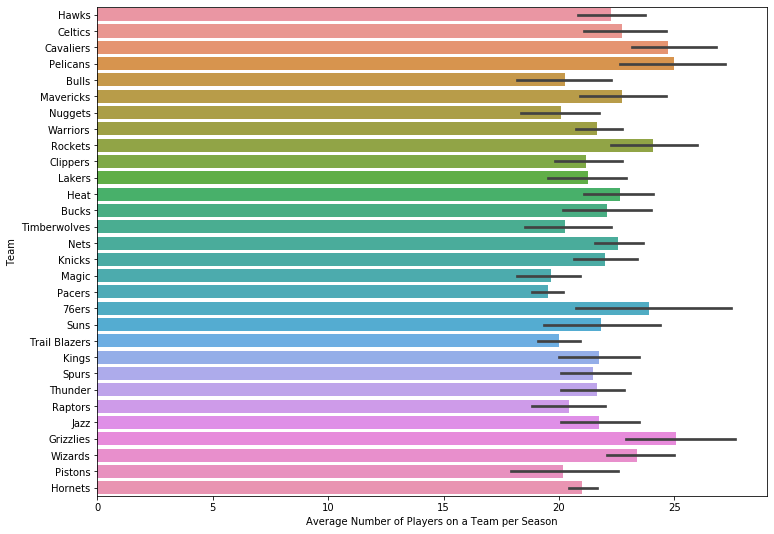

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 9)

seaborn_graph = sns.barplot(x="NUM_PLAYERS",y= "NICKNAME", data=playersPerTeam,orient = 'h')
plt.ylabel("Team")
plt.xlabel("Average Number of Players on a Team per Season")


#graph = playersPerTeam.set_index('PLAYER_NAME').plot.barh()
#plt.xlabel("Number of Seasons Played")
#plt.ylabel("Players")
#graph.get_legend().remove()
#graph


<div class="alert alert-block alert-info">
    The information in <b>players.csv</b> (above) shows that average number of players for each team (per season) is around 20 to 25 players
</div>

# games.csv

In [19]:
games.info()
games.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23195 entries, 0 to 23194
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE_EST     23195 non-null  object 
 1   GAME_ID           23195 non-null  int64  
 2   GAME_STATUS_TEXT  23195 non-null  object 
 3   HOME_TEAM_ID      23195 non-null  int64  
 4   VISITOR_TEAM_ID   23195 non-null  int64  
 5   SEASON            23195 non-null  int64  
 6   TEAM_ID_home      23195 non-null  int64  
 7   PTS_home          23096 non-null  float64
 8   FG_PCT_home       23096 non-null  float64
 9   FT_PCT_home       23096 non-null  float64
 10  FG3_PCT_home      23096 non-null  float64
 11  AST_home          23096 non-null  float64
 12  REB_home          23096 non-null  float64
 13  TEAM_ID_away      23195 non-null  int64  
 14  PTS_away          23096 non-null  float64
 15  FG_PCT_away       23096 non-null  float64
 16  FT_PCT_away       23096 non-null  float6

,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
count,2.319500e+04,2.319500e+04,2.319500e+04,23195.000000,2.319500e+04,23096.000000,23096.000000,23096.000000,23096.000000,23096.000000,23096.000000,2.319500e+04,23096.000000,23096.000000,23096.000000,23096.000000,23096.000000,23096.000000,23195.000000
mean,2.156394e+07,1.610613e+09,1.610613e+09,2010.844147,1.610613e+09,102.149117,0.459901,0.757874,0.355458,22.512253,43.174359,1.610613e+09,99.168254,0.448125,0.756188,0.348710,21.099974,41.850061,0.592326
std,5.451505e+06,8.649845e+00,8.664090e+00,4.829889,8.649845e+00,12.902191,0.056794,0.100397,0.114683,5.153124,6.597023,8.664090e+00,12.947992,0.055589,0.103148,0.112754,5.080440,6.495695,0.491413
min,1.030000e+07,1.610613e+09,1.610613e+09,2003.000000,1.610613e+09,36.000000,0.250000,0.143000,0.000000,6.000000,15.000000,1.610613e+09,33.000000,0.244000,0.143000,0.000000,4.000000,19.000000,0.000000
25%,2.060059e+07,1.610613e+09,1.610613e+09,2007.000000,1.610613e+09,93.000000,0.420000,0.696000,0.281000,19.000000,39.000000,1.610613e+09,90.000000,0.410000,0.692000,0.273000,18.000000,37.000000,0.000000
50%,2.110024e+07,1.610613e+09,1.610613e+09,2011.000000,1.610613e+09,102.000000,0.459000,0.765000,0.355000,22.000000,43.000000,1.610613e+09,99.000000,0.447000,0.762000,0.348000,21.000000,42.000000,1.000000
75%,2.160013e+07,1.610613e+09,1.610613e+09,2015.000000,1.610613e+09,111.000000,0.500000,0.826000,0.429000,26.000000,48.000000,1.610613e+09,108.000000,0.486000,0.828000,0.421000,24.000000,46.000000,1.000000
max,4.180041e+07,1.610613e+09,1.610613e+09,2019.000000,1.610613e+09,168.000000,0.684000,1.000000,1.000000,47.000000,72.000000,1.610613e+09,168.000000,0.674000,1.000000,1.000000,46.000000,81.000000,1.000000


In [20]:
games.nunique()

GAME_DATE_EST        3723
GAME_ID             23195
GAME_STATUS_TEXT        1
HOME_TEAM_ID           30
VISITOR_TEAM_ID        30
SEASON                 17
TEAM_ID_home           30
PTS_home               99
FG_PCT_home           370
FT_PCT_home           368
FG3_PCT_home          384
AST_home               41
REB_home               55
TEAM_ID_away           30
PTS_away              102
FG_PCT_away           362
FT_PCT_away           351
FG3_PCT_away          367
AST_away               41
REB_away               52
HOME_TEAM_WINS          2
dtype: int64

<div class="alert alert-block alert-info">
    The information in <b>games.csv</b> (above) shows that the range for seasons is 2003 through 2019, which is 17 seasons, with game information for 23195 games, which occured on 3723 different days.  All games are in the same status (which from looking at the data is Final score).  There are 30 teams represented in this data.<br><br>
    The min/max/mean for some of the datasets are as follows:
    <li>PTS_home (# of points scored by home team): min 36, max 168, average 102
    <li>FG_PCT_home (field goal % of home team): min 25%, max 68%, average 46%
    <li>FT_PCT_home (free throw % of home team):  min 14%, max 100%, average 76%
    <li>FG3_PCT_home (three point % of home team):  min 0%, max 100%, average 36%
    <li>AST_home (assists of home team):  min 6, max 47, average 23
    <li>REB_home (rebounds of home team):  min 15, max 72, average 43
    <li>PTS_away (# of points scored by away team): min 33, max 168, average 99
    <li>FG_PCT_away (field goal % of away team): min 24%, max 67%, average 45%
    <li>FT_PCT_away (free throw % of away team): min 14%, max 100%, average 76%
    <li>FG3_PCT_away (three point % of away team): min 0%, max 100%, average 35%
    <li>AST_away (assists of away team): min 4, max 46, average 21
    <li>REB_away (rebounds of away team): min 19, max 81, average 42
        
</div>

In [21]:
# create a game dictionary (ID to Season), so that we can use this
# in later queries as not all datasets have the ID related to the season
game_season = games.set_index('GAME_ID')['SEASON'].to_dict()

# ranking.csv

In [22]:
ranking.info()
ranking.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179533 entries, 0 to 179532
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TEAM_ID        179533 non-null  int64  
 1   LEAGUE_ID      179533 non-null  int64  
 2   SEASON_ID      179533 non-null  int64  
 3   STANDINGSDATE  179533 non-null  object 
 4   CONFERENCE     179533 non-null  object 
 5   TEAM           179533 non-null  object 
 6   G              179533 non-null  int64  
 7   W              179533 non-null  int64  
 8   L              179533 non-null  int64  
 9   W_PCT          179533 non-null  float64
 10  HOME_RECORD    179533 non-null  object 
 11  ROAD_RECORD    179533 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 16.4+ MB


,TEAM_ID,LEAGUE_ID,SEASON_ID,G,W,L,W_PCT
count,1.795330e+05,179533.0,179533.000000,179533.000000,179533.000000,179533.000000,179533.000000
mean,1.610613e+09,0.0,21383.696050,56.987378,28.497764,28.489615,0.492558
std,8.638980e+00,0.0,2424.230793,29.009481,17.489075,17.503982,0.188854
min,1.610613e+09,0.0,12003.000000,0.000000,0.000000,0.000000,0.000000
25%,1.610613e+09,0.0,22006.000000,32.000000,14.000000,14.000000,0.371000
50%,1.610613e+09,0.0,22010.000000,70.000000,29.000000,29.000000,0.500000
75%,1.610613e+09,0.0,22015.000000,82.000000,42.000000,41.000000,0.621000
max,1.610613e+09,0.0,22019.000000,82.000000,73.000000,72.000000,1.000000


In [23]:
ranking.nunique()

TEAM_ID            30
LEAGUE_ID           1
SEASON_ID          35
STANDINGSDATE    5997
CONFERENCE          2
TEAM               34
G                  83
W                  74
L                  73
W_PCT             807
HOME_RECORD       800
ROAD_RECORD       751
dtype: int64

In [24]:
lst = ranking.SEASON_ID.unique().tolist()
lst.sort()
print(lst)

[12003, 12004, 12005, 12006, 12007, 12008, 12009, 12010, 12011, 12012, 12013, 12014, 12015, 12016, 12017, 12018, 12019, 22002, 22003, 22004, 22005, 22006, 22007, 22008, 22009, 22010, 22011, 22012, 22013, 22014, 22015, 22016, 22017, 22018, 22019]


<div class="alert alert-block alert-info">
    The information in <b>ranking.csv</b> (above) shows that there are 30 teams in two conferences (east/west), and that the mean winning percentage is 49%.<br><br>
    Upon examining the SEASON_ID, it seems there is a 1 and a 2 before the season year, so both 12019 and 22019 are the year 2019.<br><br>Here are the min/max/mean for the following team statistics:<br>
<li>Number of games played during a season: min 0, max 82, average 57
<li>Number of winning games per season: min 0, max 73, average 28
<li>Number of loosing games per season: min 0, max 72, average 28
<li>Win %: min 0, max: 100%, average: 49%
</div>

# games_details.csv

In [25]:
game_details.info()
game_details.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576782 entries, 0 to 576781
Data columns (total 28 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   GAME_ID            576782 non-null  int64  
 1   TEAM_ID            576782 non-null  int64  
 2   TEAM_ABBREVIATION  576782 non-null  object 
 3   TEAM_CITY          576782 non-null  object 
 4   PLAYER_ID          576782 non-null  int64  
 5   PLAYER_NAME        576782 non-null  object 
 6   START_POSITION     221374 non-null  object 
 7   COMMENT            92260 non-null   object 
 8   MIN                484521 non-null  object 
 9   FGM                484521 non-null  float64
 10  FGA                484521 non-null  float64
 11  FG_PCT             484521 non-null  float64
 12  FG3M               484521 non-null  float64
 13  FG3A               484521 non-null  float64
 14  FG3_PCT            484521 non-null  float64
 15  FTM                484521 non-null  float64
 16  FT

,GAME_ID,TEAM_ID,PLAYER_ID,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
count,5.767820e+05,5.767820e+05,5.767820e+05,484521.000000,484521.000000,484521.000000,484521.000000,484521.000000,484521.000000,484521.000000,...,484521.000000,484521.000000,484521.000000,484521.000000,484521.000000,484521.000000,484521.000000,484521.000000,484521.000000,460860.000000
mean,2.153582e+07,1.610613e+09,2.793802e+05,3.561808,7.859736,0.415103,0.719740,2.024738,0.192470,1.752254,...,1.038521,3.014043,4.052563,2.078752,0.724266,0.463406,1.331344,2.021832,9.595601,-0.000098
std,5.496051e+06,8.659398e+00,7.768096e+06,3.007389,5.638048,0.251567,1.175101,2.456552,0.288532,2.365303,...,1.410154,2.681380,3.492974,2.464785,0.976866,0.870892,1.402128,1.506176,7.997524,10.552827
min,1.030000e+07,1.610613e+09,1.500000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-57.000000
25%,2.060063e+07,1.610613e+09,2.366000e+03,1.000000,3.000000,0.250000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,-7.000000
50%,2.110046e+07,1.610613e+09,2.007570e+05,3.000000,7.000000,0.429000,0.000000,1.000000,0.000000,1.000000,...,1.000000,2.000000,3.000000,1.000000,0.000000,0.000000,1.000000,2.000000,8.000000,0.000000
75%,2.160020e+07,1.610613e+09,2.026930e+05,5.000000,11.000000,0.563000,1.000000,3.000000,0.333000,3.000000,...,2.000000,4.000000,6.000000,3.000000,1.000000,1.000000,2.000000,3.000000,14.000000,6.000000
max,4.180041e+07,1.610613e+09,1.962938e+09,28.000000,50.000000,1.000000,14.000000,24.000000,1.000000,26.000000,...,18.000000,25.000000,31.000000,25.000000,10.000000,12.000000,12.000000,15.000000,81.000000,57.000000


In [26]:
game_details.nunique()

GAME_ID              23096
TEAM_ID                 30
TEAM_ABBREVIATION       34
TEAM_CITY               33
PLAYER_ID             2323
PLAYER_NAME           2294
START_POSITION           3
COMMENT               5329
MIN                   3382
FGM                     26
FGA                     47
FG_PCT                 308
FG3M                    15
FG3A                    25
FG3_PCT                 99
FTM                     27
FTA                     33
FT_PCT                 162
OREB                    18
DREB                    25
REB                     32
AST                     26
STL                     11
BLK                     13
TO                      13
PF                       8
PTS                     66
PLUS_MINUS             103
dtype: int64

In [27]:
game_details.FT_PCT.describe()

count    484521.000000
mean          0.437908
std           0.427186
min           0.000000
25%           0.000000
50%           0.500000
75%           0.909000
max           1.000000
Name: FT_PCT, dtype: float64

In [28]:
game_details.START_POSITION.unique()

array(['F', 'C', 'G', nan], dtype=object)

<div class="alert alert-block alert-info">
    The information in <b>games_details.csv</b> (above) shows that the min/max field goal % (efficiency of making baskets per person/game) is 0% and 100% with the average around 41.5%.<br><br>    
    However, if you look at just the three point shot field goal percentage (per person/game), it shows that while the min/max is still 0% and 100%, the average is much lower around 19.2%. <br><br>
    Lastly, the free throw percentage (per person/per game) shows the min and max still at 0% and 100%, however the mean is 43.8%, which is closer to the overall field goal percent, rather than the three point shots.<br><br>
    The starting positions are: F, C, G, and nan (empty), which corelates to Forward, Center, and Guard (and empty means the person did not play during the game).
    
</div>

In [29]:
playerdata = game_details.groupby(['PLAYER_NAME']).sum()

# all_seasons.csv

In [30]:
# since the first column is unnamed, we can rename this with index (which is what it is)
all_seasons = all_seasons.rename(columns={'Unnamed: 0': 'index'})

all_seasons.info()
all_seasons.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11145 entries, 0 to 11144
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              11145 non-null  int64  
 1   player_name        11145 non-null  object 
 2   team_abbreviation  11145 non-null  object 
 3   age                11145 non-null  float64
 4   player_height      11145 non-null  float64
 5   player_weight      11145 non-null  float64
 6   college            11145 non-null  object 
 7   country            11145 non-null  object 
 8   draft_year         11145 non-null  object 
 9   draft_round        11145 non-null  object 
 10  draft_number       11145 non-null  object 
 11  gp                 11145 non-null  int64  
 12  pts                11145 non-null  float64
 13  reb                11145 non-null  float64
 14  ast                11145 non-null  float64
 15  net_rating         11145 non-null  float64
 16  oreb_pct           111

,index,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000
mean,5572.000000,27.168686,200.812818,100.637868,52.005832,8.126487,3.560036,1.801463,-2.153899,0.055593,0.141772,0.185599,0.508099,0.131078
std,3217.428709,4.344164,9.190973,12.576295,25.069495,5.935482,2.495394,1.789940,12.150611,0.043889,0.063194,0.053047,0.098879,0.095017
min,0.000000,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2786.000000,24.000000,195.580000,90.718400,32.000000,3.500000,1.800000,0.600000,-6.300000,0.022000,0.096000,0.150000,0.478000,0.065000
50%,5572.000000,27.000000,200.660000,99.790240,58.000000,6.600000,3.000000,1.200000,-1.300000,0.043000,0.132000,0.182000,0.521000,0.102000
75%,8358.000000,30.000000,208.280000,109.315672,74.000000,11.500000,4.700000,2.400000,3.200000,0.086000,0.182000,0.218000,0.557000,0.178000
max,11144.000000,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000


In [31]:
all_seasons.nunique()

index                11145
player_name           2235
team_abbreviation       36
age                     27
player_height           30
player_weight          157
college                316
country                 76
draft_year              45
draft_round              8
draft_number            75
gp                      85
pts                    308
reb                    154
ast                    114
net_rating             707
oreb_pct               216
dreb_pct               351
usg_pct                341
ts_pct                 529
ast_pct                479
season                  24
dtype: int64

<div class="alert alert-block alert-info">
    The information in <b>all_seasons.csv</b> (above) shows the following min/max/mean of the 2235 players' height, weight, and age:
    <li>Age: min 18 years, max 44 years, average 27 years
    <li>Height: min 160cm, max 231cm, average 201cm
    <li>Weight: min 60 kilograms, 163 kilograms, average 100 kilograms
</div>

In [32]:
#player = all_seasons[all_seasons.groupby(['player_name']).sum().reset_index()]
player = all_seasons[['player_name','age','player_height','player_weight']].sort_values("player_name", ascending=True)
player
#num_of_names_per_year[:5]

,player_name,age,player_height,player_weight
800,A.C. Green,34.0,205.74,102.05820
1054,A.C. Green,35.0,205.74,102.05820
1319,A.C. Green,36.0,205.74,102.05820
138,A.C. Green,33.0,205.74,102.05820
1948,A.C. Green,37.0,205.74,102.05820
...,...,...,...,...
2336,Zydrunas Ilgauskas,27.0,220.98,117.93392
5696,Zydrunas Ilgauskas,34.0,220.98,117.93392
6676,Zydrunas Ilgauskas,36.0,220.98,117.93392
3655,Zydrunas Ilgauskas,30.0,220.98,117.93392


<div class="alert alert-block alert-info">
    The above detail breaks down the player name, as well as their height/weight/age.  Sorting by name showed a potential flaw in our data, specifically that as the age changes - the height and weight did not change for AC Green and Zydrundas Ilgauskas.  However, if you examine the data manually, you will find the stats for other players have changed (example: Dennis Rodman).  So while some data seems not to have been updated (or potentially stayed the same) for every season, other data did change.  This is something to keep an eye out when making analysis.
</div>

### -------------------------------------------------------------------------------------
# DATA ANALYSIS, VISUALIZATION, AND INSIGHTS
### -------------------------------------------------------------------------------------

<div class="alert alert-block alert-info">
<h3>#4. Data Analysis, Visualization, and Insights</h3><br>
<i>Are there any interesting insights that you can derive from the data? This may include the questions you originally planned to address in your course project proposal, as well as any other insights you have found. Examples include interesting correlations, interesting
differences in a variable value between categories of another variable (e.g., the average salary of people computed separately for people from each country), etc.<br>
Include at least one visualization based on altair/vega/vega-lite (include the source code). Other visualizations can be created using any suitable library or tool.
</i><br>   
<b>-----------------------------------------------------</b><br><br>
<div>
<b>Below we explore some of the questions we have asked</b><br><br>
</div>

<div class="alert alert-block alert-info">
    -------------------------------------------
    <h3>Analysis of Player Attributes</h3><br>
</div>

In [33]:
season96 =  pd.DataFrame()
season96 = all_seasons.copy()
season96 = season96[(season96['season'] == '1996-97')]


alt.Chart(season96, title = "Season 1996-97 Player Data").mark_circle(size=30).encode(
    x='player_weight',
    y='player_height',
    color='team_abbreviation',
    tooltip=['player_name', 'team_abbreviation', 'player_weight', 'player_height']
).interactive()

alt.Chart(...)

In [34]:
season99 =  pd.DataFrame()
season99 = all_seasons.copy()
season99 = season99[season99.season == '1999-00']


alt.Chart(season99, title = "Season 1999-00 Player Data").mark_circle(size=30).encode(
    x='player_weight',
    y='player_height',
    color='team_abbreviation',
    tooltip=['player_name', 'team_abbreviation', 'player_weight', 'player_height']
).interactive()

alt.Chart(...)

In [35]:
season02 =  pd.DataFrame()
season02 = all_seasons.copy()
season02 = season02[season02.season == '2002-03']


alt.Chart(season02, title = "Season 2002-03 Player Data").mark_circle(size=30).encode(
    x='player_weight',
    y='player_height',
    color='team_abbreviation',
    tooltip=['player_name', 'team_abbreviation', 'player_weight', 'player_height']
).interactive()

alt.Chart(...)

In [36]:
season05 =  pd.DataFrame()
season05 = all_seasons.copy()
season05 = season05[season05.season == '2005-06']


alt.Chart(season05, title = "Season 2005-06 Player Data").mark_circle(size=30).encode(
    x='player_weight',
    y='player_height',
    color='team_abbreviation',
    tooltip=['player_name', 'team_abbreviation', 'player_weight', 'player_height']
).interactive()

alt.Chart(...)

In [37]:
season08 =  pd.DataFrame()
season08 = all_seasons.copy()
season08 = season08[season08.season == '2008-09']


alt.Chart(season08, title = "Season 2008-09 Player Data").mark_circle(size=30).encode(
    x='player_weight',
    y='player_height',
    color='team_abbreviation',
    tooltip=['player_name', 'team_abbreviation', 'player_weight', 'player_height']
).interactive()

alt.Chart(...)

In [38]:
season11 =  pd.DataFrame()
season11 = all_seasons.copy()
season11 = season11[season11.season == '2011-12']


alt.Chart(season11, title = "Season 2011-12 Player Data").mark_circle(size=30).encode(
    x='player_weight',
    y='player_height',
    color='team_abbreviation',
    tooltip=['player_name', 'team_abbreviation', 'player_weight', 'player_height']
).interactive()

alt.Chart(...)

In [39]:
season14 =  pd.DataFrame()
season14 = all_seasons.copy()
season14 = season14[season14.season == '2014-15']


alt.Chart(season14, title = "Season 2014-15 Player Data").mark_circle(size=30).encode(
    x='player_weight',
    y='player_height',
    color='team_abbreviation',
    tooltip=['player_name', 'team_abbreviation', 'player_weight', 'player_height']
).interactive()

alt.Chart(...)

In [40]:
season17 =  pd.DataFrame()
season17 = all_seasons.copy()
season17 = season17[season17.season == '2017-18']


alt.Chart(season17, title = "Season 2017-18 Player Data").mark_circle(size=30).encode(
    x='player_weight',
    y='player_height',
    color='team_abbreviation',
    tooltip=['player_name', 'team_abbreviation', 'player_weight', 'player_height']
).interactive()

alt.Chart(...)

In [41]:
season19 =  pd.DataFrame()
season19 = all_seasons.copy()
season19 = season19[season19.season == '2019-20']


alt.Chart(season19, title = "Season 2019-20 Player Data").mark_circle(size=30).encode(
    x='player_weight',
    y='player_height',
    color='team_abbreviation',
    tooltip=['player_name', 'team_abbreviation', 'player_weight', 'player_height']
).interactive()

alt.Chart(...)

<div class="alert alert-block alert-info">

One of the questions we sought to address in our proposal was: 
How are today’s players attributes different from their predecessors?  (age, height, weight)
To analyze this, we plotted scatterplots of the player's weight and age with 3 year increments. We used the 2019 season for the final plot, since the 2020 season was cancelled and that data was not collected. Overall, player's weights have shifted marginally upward as the seasons have gone on. Sub 70 kilogram athletes disappeared from the NBA in the  2011-2014 period. From the 2017 to the 2019 season, we can see that there are fewer sub 80 kilogram athletes as well. Following the 2011-2014 period as well, there were no longer any players under 175 centimeters tall. In the earlier seasons, there were 1-4 players in the 160-175 height group. The 190-210 cm height group is the most populated height group through all of the seasons.<br><br> 

While doing this analysis, we found certain player's heights and weights did not change as their age did. A player's height should remain largely stable barring extraordinary circumstances. A player's weight on the other hand should change. In the earlier seasons, weight reporting wasn't checked as thoroughly and this could explain the lack of movement for this metric. Additionally, height is generally a more important measurement which has become more strictly monitored as the NBA moved forward. 
</div>



<div class="alert alert-block alert-info">
    -------------------------------------------
    <h3>Analysis of Height vs Rebounds</h3><br>
    <b>Do taller players make more rebounds?</b>
    </div>

In [42]:
import math
rebound_Height96 =  pd.DataFrame()
rebound_Height96 = all_seasons.copy()
#rebound_Height96['player_height'] = rebound_Height96['player_height'].dropna().map(lambda x: (math.log(x)))
#rebound_Height96['reb'] = rebound_Height96['reb'].dropna().map(lambda x: math.log(x) if x>0 else x)

rebound_Height96 = rebound_Height96[rebound_Height96.season == '1996-97']


alt.Chart(rebound_Height96, title = "Season 1996-97 Rebound vs Height Data").mark_circle(size=30).encode(
    x='reb',
    y='player_height',
    color='team_abbreviation',
    tooltip=['player_name', 'team_abbreviation', 'reb', 'player_height']
).interactive()


alt.Chart(...)

[[  4.70710383 209.76513661]
 [  1.88902439 186.25634146]
 [  3.11193182 198.7425    ]]


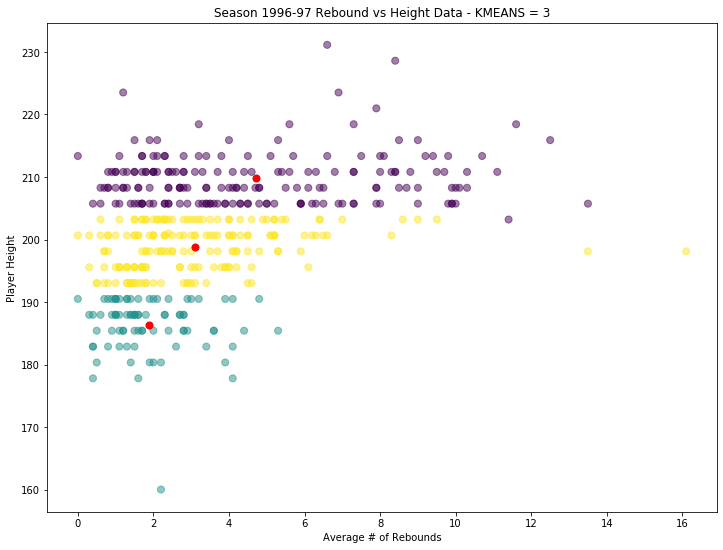

In [43]:
from sklearn import preprocessing
from sklearn.cluster import KMeans
dataRvH96 = rebound_Height96.copy()
dataRvH96 = dataRvH96[['reb','player_height']]
#normalized_X = preprocessing.normalize(dataRvH96)

kmeansRvH96 = KMeans(n_clusters=3).fit(dataRvH96)
centroidsRvH96 = kmeansRvH96.cluster_centers_
print(centroidsRvH96)

plt.scatter(dataRvH96['reb'], dataRvH96['player_height'], c= kmeansRvH96.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroidsRvH96[:, 0], centroidsRvH96[:, 1], c='red', s=50)
plt.title("Season 1996-97 Rebound vs Height Data - KMEANS = 3")
plt.xlabel("Average # of Rebounds")
plt.ylabel("Player Height")
plt.show()


[[  4.70944882 211.56      ]
 [  2.34537037 194.54518519]
 [  1.875      184.70033333]
 [  4.11027397 203.27191781]]


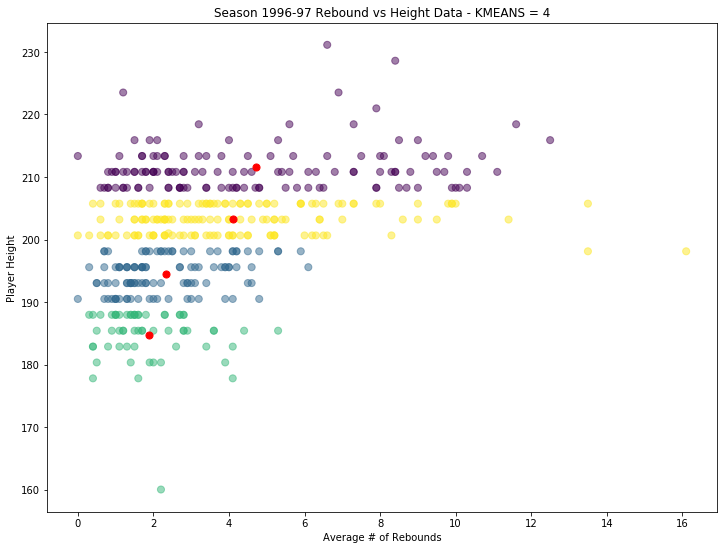

In [44]:
from sklearn import preprocessing
from sklearn.cluster import KMeans
dataRvH96 = rebound_Height96.copy()
dataRvH96 = dataRvH96[['reb','player_height']]
#normalized_X = preprocessing.normalize(dataRvH96)

kmeansRvH96 = KMeans(n_clusters=4).fit(dataRvH96)
centroidsRvH96 = kmeansRvH96.cluster_centers_
print(centroidsRvH96)

plt.scatter(dataRvH96['reb'], dataRvH96['player_height'], c= kmeansRvH96.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroidsRvH96[:, 0], centroidsRvH96[:, 1], c='red', s=50)
plt.title("Season 1996-97 Rebound vs Height Data - KMEANS = 4")
plt.xlabel("Average # of Rebounds")
plt.ylabel("Player Height")
plt.show()

[[  3.63728814 200.94271186]
 [  1.875      184.70033333]
 [  4.08923077 207.83061538]
 [  6.12307692 214.72769231]
 [  2.12716049 193.35358025]]


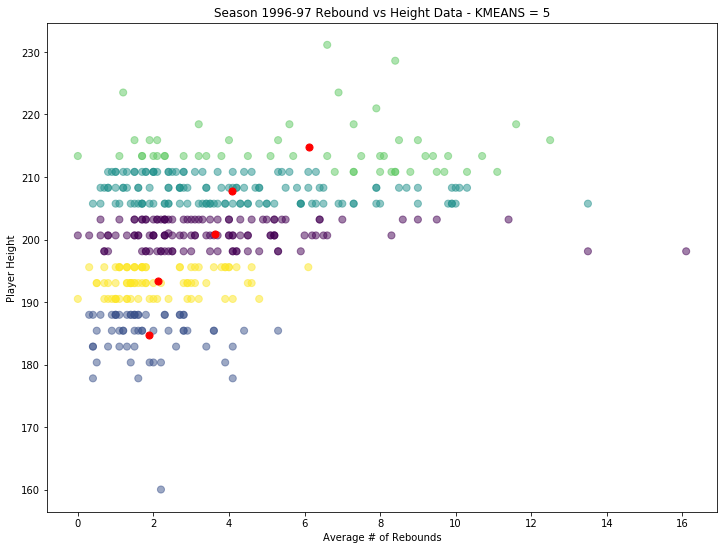

In [45]:
from sklearn import preprocessing
from sklearn.cluster import KMeans
dataRvH96 = rebound_Height96.copy()
dataRvH96 = dataRvH96[['reb','player_height']]
#normalized_X = preprocessing.normalize(dataRvH96)

kmeansRvH96 = KMeans(n_clusters=5).fit(dataRvH96)
centroidsRvH96 = kmeansRvH96.cluster_centers_
print(centroidsRvH96)

plt.scatter(dataRvH96['reb'], dataRvH96['player_height'], c= kmeansRvH96.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroidsRvH96[:, 0], centroidsRvH96[:, 1], c='red', s=50)
plt.title("Season 1996-97 Rebound vs Height Data - KMEANS = 5")
plt.xlabel("Average # of Rebounds")
plt.ylabel("Player Height")
plt.show()

In [46]:
rebound_Height19 =  pd.DataFrame()
rebound_Height19 = all_seasons.copy()
#rebound_Height19['player_height'] = rebound_Height19['player_height'].dropna().map(lambda x: (math.log(x)))
#rebound_Height19['reb'] = rebound_Height19['reb'].dropna().map(lambda x: (math.log(x)) if x>0 else x)

rebound_Height19 = rebound_Height19[rebound_Height19.season == '2019-20']


alt.Chart(rebound_Height19, title = "Season 2019-20 Rebound vs Height Data").mark_circle(size=30).encode(
    x='reb',
    y='player_height',
    color='team_abbreviation',
    tooltip=['player_name', 'team_abbreviation', 'reb', 'player_height']
).interactive()

alt.Chart(...)

[[  3.39321267 199.25782805]
 [  2.33701299 188.55376623]
 [  5.33381295 209.46776978]]


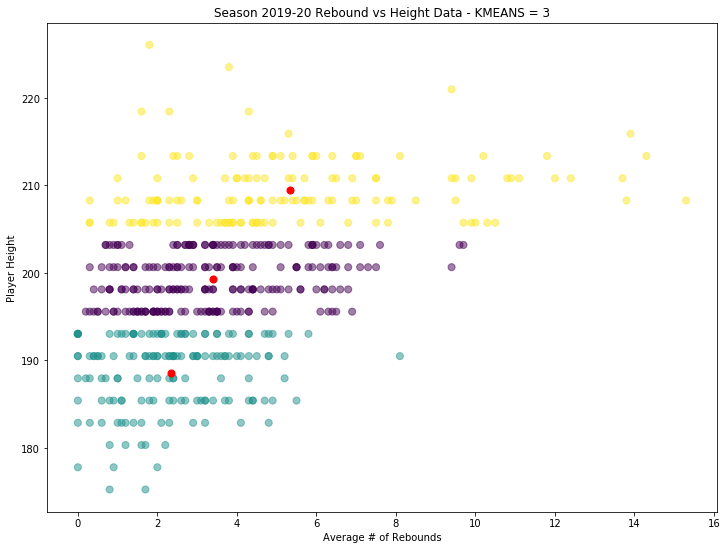

In [47]:
from sklearn import preprocessing
from sklearn.cluster import KMeans
dataRvH19 = rebound_Height19.copy()
dataRvH19 = dataRvH19[['reb','player_height']]


kmeansRvH19 = KMeans(n_clusters=3).fit(dataRvH19)
centroidsRvH19 = kmeansRvH19.cluster_centers_
print(centroidsRvH19)

plt.scatter(dataRvH19['reb'], dataRvH19['player_height'], c= kmeansRvH19.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroidsRvH19[:, 0], centroidsRvH19[:, 1], c='red', s=50)
plt.title("Season 2019-20 Rebound vs Height Data - KMEANS = 3")
plt.xlabel("Average # of Rebounds")
plt.ylabel("Player Height")
plt.show()


[[  6.0447619  210.67485714]
 [  2.55810811 193.28027027]
 [  3.58247423 201.55030928]
 [  2.13283582 184.51014925]]


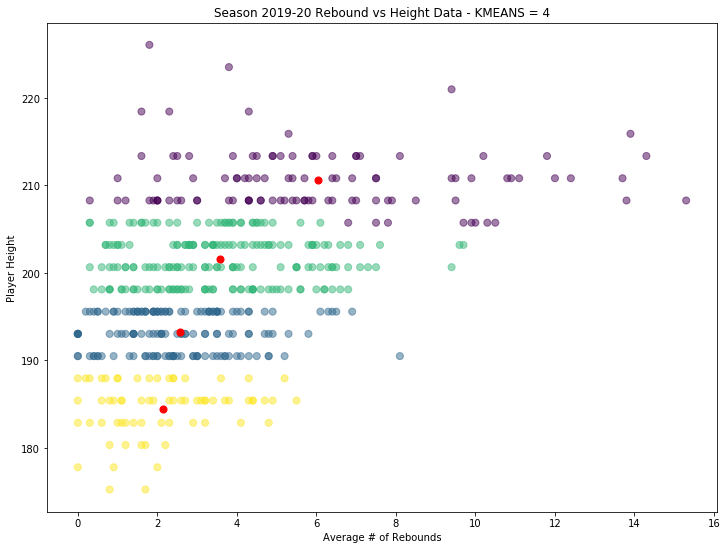

In [48]:
from sklearn import preprocessing
from sklearn.cluster import KMeans
dataRvH19 = rebound_Height19.copy()
dataRvH19 = dataRvH19[['reb','player_height']]


kmeansRvH19 = KMeans(n_clusters=4).fit(dataRvH19)
centroidsRvH19 = kmeansRvH19.cluster_centers_
print(centroidsRvH19)

plt.scatter(dataRvH19['reb'], dataRvH19['player_height'], c= kmeansRvH19.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroidsRvH19[:, 0], centroidsRvH19[:, 1], c='red', s=50)
plt.title("Season 2019-20 Rebound vs Height Data - KMEANS = 4")
plt.xlabel("Average # of Rebounds")
plt.ylabel("Player Height")
plt.show()


[[  3.19518072 197.95168675]
 [  2.218      183.3372    ]
 [  6.734375   212.5265625 ]
 [  2.39423077 191.06173077]
 [  4.07615385 205.31015385]]


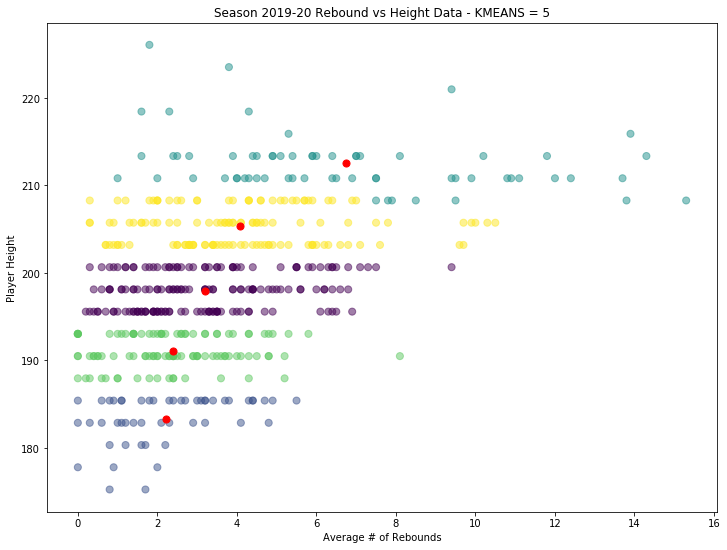

In [49]:
from sklearn import preprocessing
from sklearn.cluster import KMeans
dataRvH19 = rebound_Height19.copy()
dataRvH19 = dataRvH19[['reb','player_height']]


kmeansRvH19 = KMeans(n_clusters=5).fit(dataRvH19)
centroidsRvH19 = kmeansRvH19.cluster_centers_
print(centroidsRvH19)

plt.scatter(dataRvH19['reb'], dataRvH19['player_height'], c= kmeansRvH19.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroidsRvH19[:, 0], centroidsRvH19[:, 1], c='red', s=50)
plt.title("Season 2019-20 Rebound vs Height Data - KMEANS = 5")
plt.xlabel("Average # of Rebounds")
plt.ylabel("Player Height")
plt.show()


## Comparing the Manual finding of clusters to scikit-learn functions
##### Used Information from: https://benalexkeen.com/k-means-clustering-in-python/

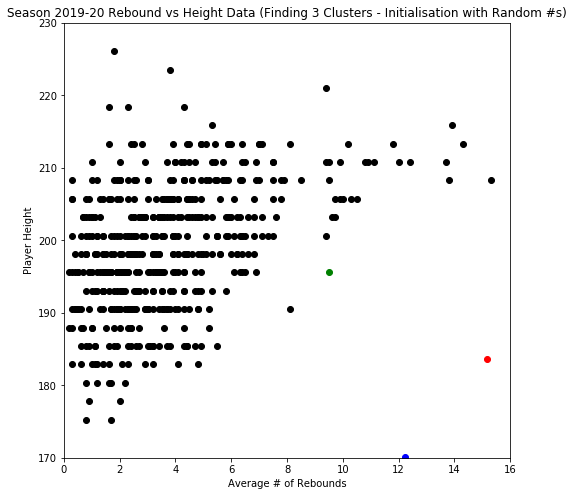

In [52]:
## Initialisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# drop rows where rebound = 0.
HRdata = dataRvH19.drop(dataRvH19[dataRvH19.reb==0].index)

 
np.random.seed(200)
k = 3
# centroids[i] = [x, y]
centroids = {
    i+1: [np.random.uniform(0, 16), np.random.uniform(170, 230)]
    for i in range(k)
}
    
fig = plt.figure(figsize=(8, 8))
plt.scatter(HRdata['reb'], HRdata['player_height'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 16)
plt.ylim(170, 230)
plt.title("Season 2019-20 Rebound vs Height Data (Finding 3 Clusters - Initialisation with Random #s)")
plt.xlabel("Average # of Rebounds")
plt.ylabel("Player Height")
plt.show()

       reb  player_height  distance_from_1  distance_from_2  distance_from_3  \
10631  1.9         200.66        21.614150         9.085118        32.189623   
10632  3.0         190.50        13.986631         8.331514        22.324115   
10633  1.7         195.58        18.025550         7.811621        27.502490   
10634  2.9         190.50        14.073673         8.409891        22.365629   
10635  2.9         193.04        15.479284         7.125264        24.696985   

       closest color  
10631        2     g  
10632        2     g  
10633        2     g  
10634        2     g  
10635        2     g  


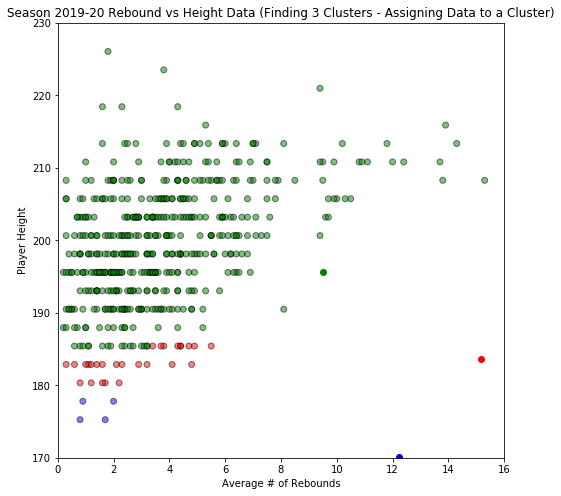

In [53]:
## Assignment Stage

def assignment(HRdata, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        HRdata['distance_from_{}'.format(i)] = (
            np.sqrt(
                (HRdata['reb'] - centroids[i][0]) ** 2
                + (HRdata['player_height'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    HRdata['closest'] = HRdata.loc[:, centroid_distance_cols].idxmin(axis=1)
    HRdata['closest'] = HRdata['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    HRdata['color'] = HRdata['closest'].map(lambda x: colmap[x])
    return HRdata

HRdata = assignment(HRdata, centroids)
print(HRdata.head())

fig = plt.figure(figsize=(8, 8))
plt.scatter(HRdata['reb'], HRdata['player_height'], color=HRdata['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.title("Season 2019-20 Rebound vs Height Data (Finding 3 Clusters - Assigning Data to a Cluster)")
plt.xlabel("Average # of Rebounds")
plt.ylabel("Player Height")
plt.xlim(0, 16)
plt.ylim(170, 230)
plt.show()

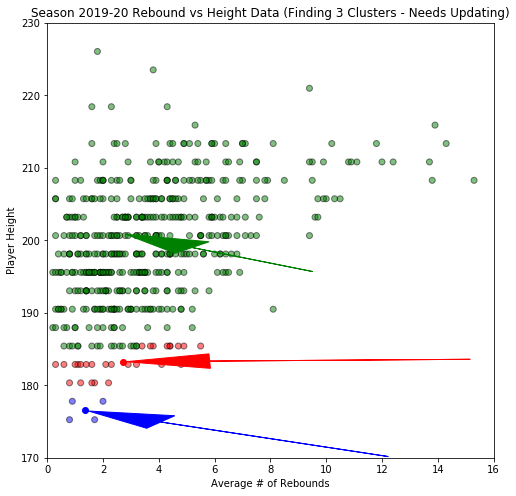

In [54]:
## Update Stage

import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(HRdata[HRdata['closest'] == i]['reb'])
        centroids[i][1] = np.mean(HRdata[HRdata['closest'] == i]['player_height'])
    return k

centroids = update(centroids)
    
fig = plt.figure(figsize=(8, 8))
ax = plt.axes()
plt.scatter(HRdata['reb'], HRdata['player_height'], color=HRdata['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.title("Season 2019-20 Rebound vs Height Data (Finding 3 Clusters - Needs Updating)")
plt.xlabel("Average # of Rebounds")
plt.ylabel("Player Height")
plt.xlim(0, 16)
plt.ylim(170, 230)
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
    ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])
plt.show()

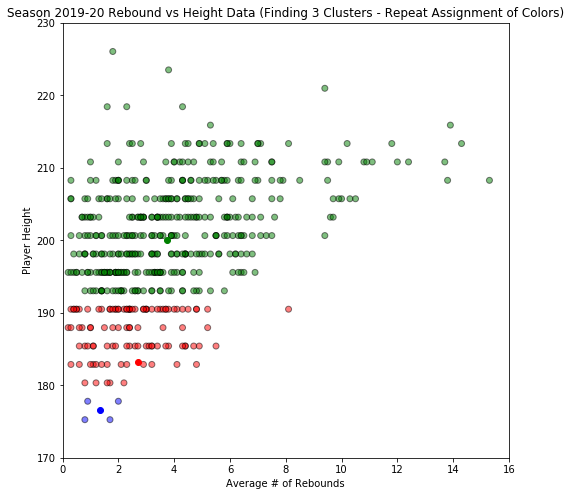

In [55]:
## Repeat Assigment Stage

HRdata = assignment(HRdata, centroids)

# Plot results
fig = plt.figure(figsize=(8, 8))
plt.scatter(HRdata['reb'], HRdata['player_height'], color=HRdata['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.title("Season 2019-20 Rebound vs Height Data (Finding 3 Clusters - Repeat Assignment of Colors)")
plt.xlabel("Average # of Rebounds")
plt.ylabel("Player Height")
plt.xlim(0, 16)
plt.ylim(170, 230)
plt.show()

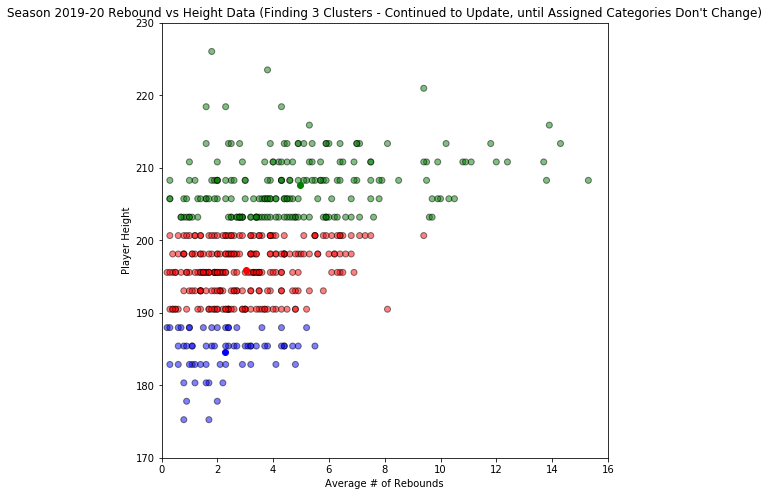

In [56]:
# Continue until all assigned categories don't change any more
while True:
    closest_centroids = HRdata['closest'].copy(deep=True)
    centroids = update(centroids)
    HRdata = assignment(HRdata, centroids)
    if closest_centroids.equals(HRdata['closest']):
        break

fig = plt.figure(figsize=(8, 8))
plt.scatter(HRdata['reb'], HRdata['player_height'], color=HRdata['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.title("Season 2019-20 Rebound vs Height Data (Finding 3 Clusters - Continued to Update, until Assigned Categories Don't Change)")
plt.xlabel("Average # of Rebounds")
plt.ylabel("Player Height")
plt.xlim(0, 16)
plt.ylim(170, 230)
plt.show()

#### Compare to KMeans.fit

In [57]:
from sklearn.cluster import KMeans

HRdata2 = dataRvH19.drop(dataRvH19[dataRvH19.reb==0].index)


kmeans2 = KMeans(n_clusters=3)
kmeans2.fit(HRdata2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [58]:
labels2 = kmeans2.predict(HRdata2)
centroids2 = kmeans2.cluster_centers_

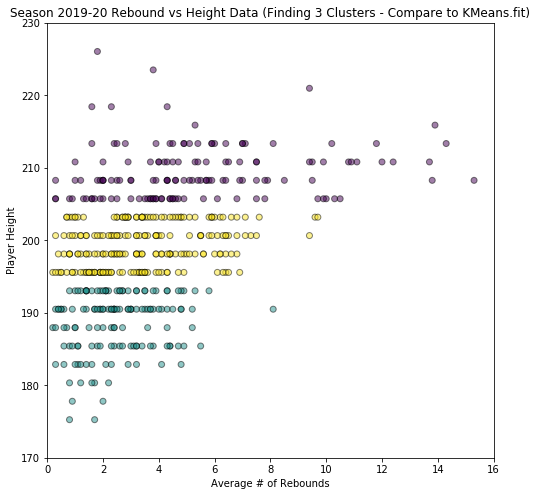

In [59]:
fig = plt.figure(figsize=(8, 8))
#colors2 = map(lambda x: (colmap[x+1]), labels2)
plt.scatter(HRdata2['reb'], HRdata2['player_height'], c= kmeans2.labels_.astype(float), alpha=0.5, edgecolor='k')
#for idx, centroid in enumerate(centroids): plt.scatter(*centroid, color=colmap[idx+1])
plt.title("Season 2019-20 Rebound vs Height Data (Finding 3 Clusters - Compare to KMeans.fit)")
plt.xlabel("Average # of Rebounds")
plt.ylabel("Player Height")
plt.xlim(0, 16)
plt.ylim(170, 230)
plt.show()

<div class="alert alert-block alert-info">
   Ultimately, the graphs show that taller players get more rebounds.  (And if you compare the data from 1996-97 season to 1999-20 season, you will see that the height plays an even more important role in the rebounds.
</div>

#### Try to use centroids from 2019-2020 data and see how 2018-2019 data fits

In [60]:
### Inspect centroids from 2019-2020 data
print(centroids)

{1: [3.038211382113821, 195.8897560975618], 2: [4.95309278350515, 207.69082474226815], 3: [2.2682539682539677, 184.57333333333324]}


       reb  player_height  distance_from_1  distance_from_2  distance_from_3  \
10101  0.7         190.50         5.875092        17.709129         6.130644   
10102  1.9         190.50         5.508629        17.459835         5.938096   
10103  3.1         190.50         5.390110        17.290414         5.984746   
10104  1.5         198.12         2.709259        10.174701        13.568434   
10105  2.5         200.66         4.800510         7.446486        16.088336   

       closest color  
10101        1     r  
10102        1     r  
10103        1     r  
10104        1     r  
10105        1     r  


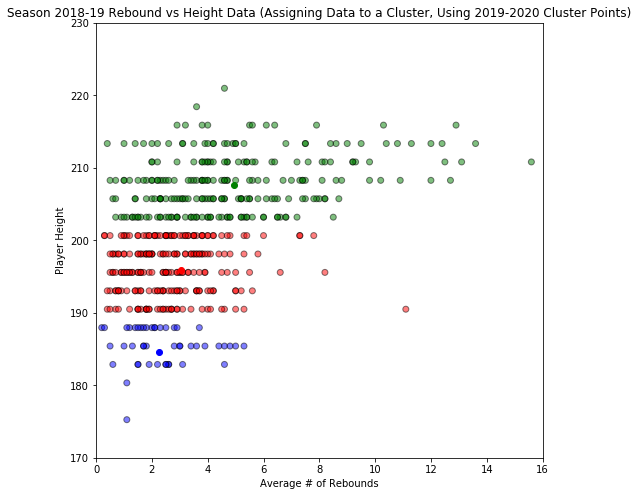

In [61]:
rebound_Height18 =  pd.DataFrame()
rebound_Height18 = all_seasons.copy()

rebound_Height18 = rebound_Height18[rebound_Height18.season == '2018-19']

dataRvH18 = rebound_Height18.copy()
dataRvH18 = dataRvH18[['reb','player_height']]

# drop rows where rebound = 0.
HRdata18 = dataRvH18.drop(dataRvH18[dataRvH18.reb==0].index)


def assignment(HRdata18, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        HRdata18['distance_from_{}'.format(i)] = (
            np.sqrt(
                (HRdata18['reb'] - centroids[i][0]) ** 2
                + (HRdata18['player_height'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    HRdata18['closest'] = HRdata18.loc[:, centroid_distance_cols].idxmin(axis=1)
    HRdata18['closest'] = HRdata18['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    HRdata18['color'] = HRdata18['closest'].map(lambda x: colmap[x])
    return HRdata18

HRdata18 = assignment(HRdata18, centroids)
print(HRdata18.head())

fig = plt.figure(figsize=(8, 8))
plt.scatter(HRdata18['reb'], HRdata18['player_height'], color=HRdata18['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.title("Season 2018-19 Rebound vs Height Data (Assigning Data to a Cluster, Using 2019-2020 Cluster Points)")
plt.xlabel("Average # of Rebounds")
plt.ylabel("Player Height")
plt.xlim(0, 16)
plt.ylim(170, 230)
plt.show()



In [62]:
from sklearn.cluster import KMeans

HRdata18_FIT = dataRvH18.drop(dataRvH18[dataRvH18.reb==0].index)


kmeans18_FIT = KMeans(n_clusters=3)
kmeans18_FIT.fit(HRdata18_FIT)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [63]:
labels18_FIT = kmeans18_FIT.predict(HRdata18_FIT)
centroids18_FIT = kmeans18_FIT.cluster_centers_

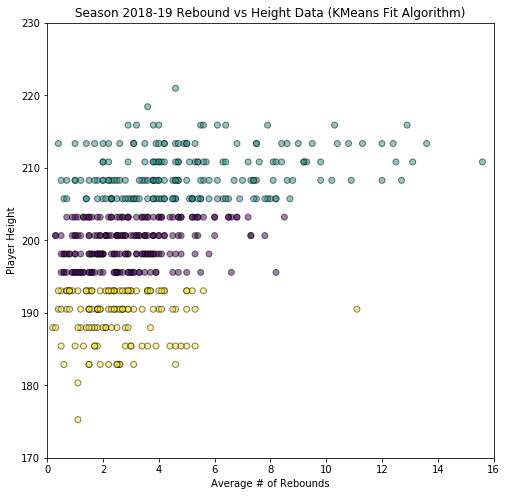

In [64]:
fig = plt.figure(figsize=(8, 8))

plt.scatter(HRdata18_FIT['reb'], HRdata18_FIT['player_height'], c= kmeans18_FIT.labels_.astype(float), alpha=0.5, edgecolor='k')
plt.title("Season 2018-19 Rebound vs Height Data (KMeans Fit Algorithm)")
plt.xlabel("Average # of Rebounds")
plt.ylabel("Player Height")
plt.xlim(0, 16)
plt.ylim(170, 230)
plt.show()

<div class="alert alert-block alert-info">
    -------------------------------------------
    <h3>Analysis of games (home vs away data)</h3><br>
    <b>Is there a home advantage?</b>
    </div>

In [65]:
# map home and away team names
games['HOME'] = games['HOME_TEAM_ID'].map(team_dict)
games['AWAY'] = games['VISITOR_TEAM_ID'].map(team_dict)

# map a column if AWAY Wins 
games['AWAY_TEAM_WINS'] = games['HOME_TEAM_WINS'].map(lambda x: 1 if x == 0 else 0)

# map a year column from the date
games['YEAR'] = games['GAME_DATE_EST'].str[:4] 


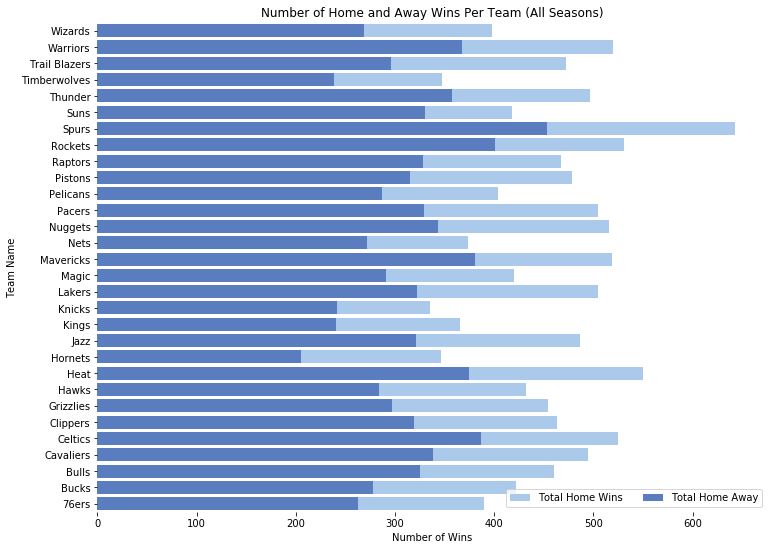

In [81]:

plt.rcParams['figure.figsize'] = (12, 9)

homeGameWins = games.groupby(['HOME']).sum().sort_values("HOME", ascending=False).reset_index()
awayGameWins = games.groupby(['AWAY']).sum().sort_values("AWAY", ascending=False).reset_index()

sns.set_color_codes("pastel")
sns.barplot(x="HOME_TEAM_WINS", y="HOME", data=homeGameWins,
            label="Total Home Wins", color="b")

sns.set_color_codes("muted")
sns.barplot(x="AWAY_TEAM_WINS", y="AWAY", data=awayGameWins,
            label="Total Home Away", color="b")

# Add a legend and informative axis label
plt.title("Number of Home and Away Wins Per Team (All Seasons)")
plt.ylabel("Team Name")
plt.xlabel("Number of Wins")
plt.legend(ncol=2, loc="lower right", frameon=True)
sns.despine(left=True, bottom=True)


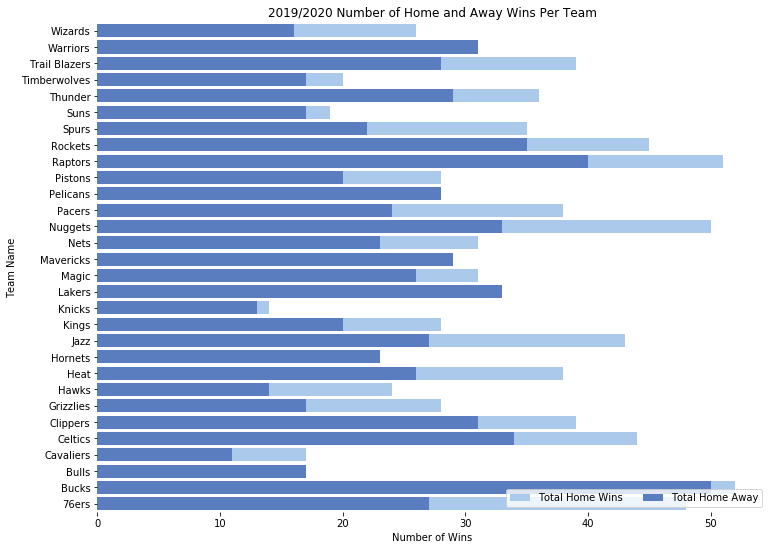

In [82]:
currGames = games[(games['YEAR'] == '2019') | (games['YEAR'] == '2020')]
currHomeWins = currGames.groupby(['HOME']).sum().sort_values("HOME", ascending=False).reset_index()
currAwayWins = currGames.groupby(['AWAY']).sum().sort_values("AWAY", ascending=False).reset_index()

sns.set_color_codes("pastel")
sns.barplot(x="HOME_TEAM_WINS", y="HOME", data=currHomeWins,
            label="Total Home Wins", color="b")

sns.set_color_codes("muted")
sns.barplot(x="AWAY_TEAM_WINS", y="AWAY", data=currAwayWins,
            label="Total Home Away", color="b")

# Add a legend and informative axis label
plt.ylabel("Team Name")
plt.xlabel("Number of Wins")
plt.title("2019/2020 Number of Home and Away Wins Per Team")
plt.legend(ncol=2, loc="lower right", frameon=True)
sns.despine(left=True, bottom=True)


<div class="alert alert-block alert-info">
    The tables (above) shows that over all the data, games have been won more at home, rather than being won on the road. Even when we look at the most current season (2019/2020), home games have more wins.  (So there really is such a thing as a home field advantage.)
</div>

<div class="alert alert-block alert-info">
    -------------------------------------------
    <h3>Analysis of Average Winning Percentage by Team</h3><br>
    </div>

Text(0.5, 0, 'Average Winning Pecentage (%)')

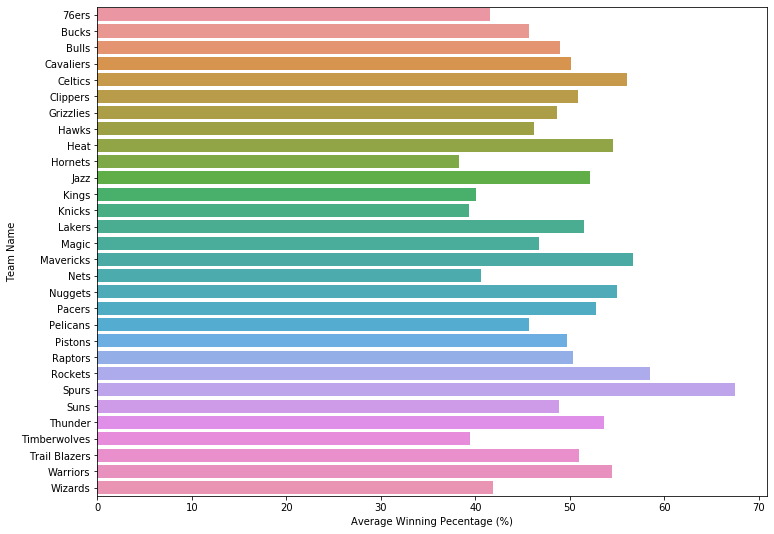

In [83]:
# Map Team nicknames to a dictionary, and then add a column to ranking to show team nicknames instead of ID
ranking['NICKNAME'] = ranking['TEAM_ID'].map(team_dict)

# Find the averahge of all numberical columns (And Group By NickName)
WinPercent = ranking.groupby(['NICKNAME']).mean()

# change WinPercent to X*100 and reset the index
WinPercent['Win_Percent'] = WinPercent['W_PCT'].map(lambda x: (x*100))
WinPercent = WinPercent.reset_index()

seaborn_graph = sns.barplot(x="Win_Percent",y="NICKNAME", data=WinPercent,orient = 'h')
plt.ylabel("Team Name")
plt.xlabel("Average Winning Pecentage (%)")

Text(0.5, 0, 'Average Winning % for 2019 season')

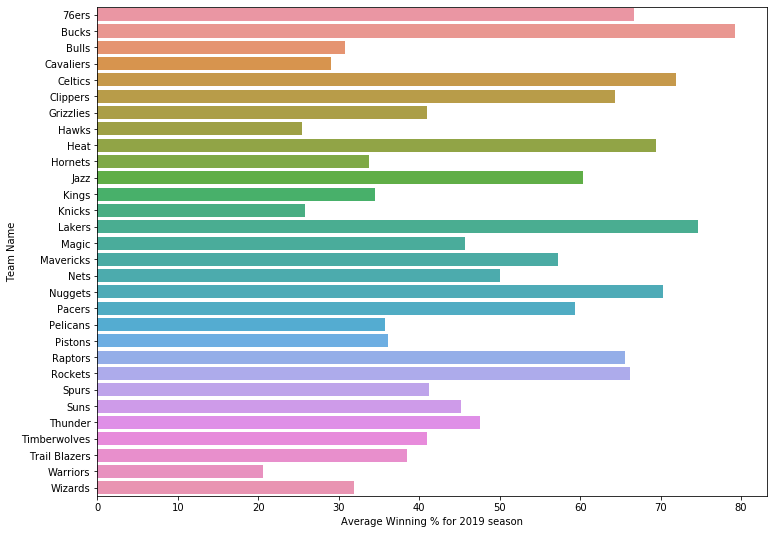

In [84]:
# Find the averahge of all numberical columns for only most recent seasons (And Group By NickName)
CurrSeasonWPCT = ranking[(ranking['SEASON_ID'] == 22019) | (ranking['SEASON_ID'] == 12019)].groupby(['NICKNAME']).mean()

# change WinPercent to X*100 and reset the index
CurrSeasonWPCT['Win_Percent'] = CurrSeasonWPCT['W_PCT'].map(lambda x: (x*100))
CurrSeasonWPCT = CurrSeasonWPCT.reset_index()

seaborn_graph = sns.barplot(x="Win_Percent",y="NICKNAME", data=CurrSeasonWPCT,orient = 'h')
plt.ylabel("Team Name")
plt.xlabel("Average Winning % for 2019 season")

<div class="alert alert-block alert-info">
    The tables above show that on average (spanning all seasons), the Spurs have a much higher winning percentage than any other teams, and the Heat had the lowest average winning percentage.<br><br>
    However, when you look at just the 2019 season, it seems that the Bucks and Lakers have the highest average winning percentages, while the Warrors have a low winning percentage.  Additionlly, the Heat may have had many bad seasons, their current season is going strong (until the coronavirus I assume!)
</div>

<div class="alert alert-block alert-info">
    -------------------------------------------
    <h3>Analysis of Which Position Gets the Most Points</h3><br>
    </div>

In [85]:
position = game_details
position['START_POSITION'] = game_details['START_POSITION'].dropna().map(lambda x: "Forward" if x == "F" else x)
position['START_POSITION'] = position['START_POSITION'].dropna().map(lambda x: "Center" if x == "C" else x)
position['START_POSITION'] = position['START_POSITION'].dropna().map(lambda x: "Guard" if x == "G" else x)
position = game_details.groupby('START_POSITION').mean().reset_index()

alt.Chart(position, title = "Mean Number of Points Scored Per Starting Position (Per Game)").mark_bar().encode(
    x=alt.X('PTS'),
    y='START_POSITION',
    color=alt.condition(
        alt.datum.START_POSITION == 'Guard',
        alt.value('orange'),     # which sets the bar orange.
        alt.value('steelblue')   # And if it's not true it sets the bar steelblue.
)
).properties(width=400)


#Using Pandas, you could graph this way:
#position['START_POSITION'] = game_details['START_POSITION'].dropna().map(lambda x: "Forward" if x == "F" else x)
#position['START_POSITION'] = position['START_POSITION'].dropna().map(lambda x: "Center" if x == "C" else x)
#position['START_POSITION'] = position['START_POSITION'].dropna().map(lambda x: "Guard" if x == "G" else x)

#position = game_details.groupby('START_POSITION').mean().reset_index()
#position = position[['START_POSITION','PTS']].set_index('START_POSITION').sort_index()
#pos_graph = position.plot.barh()



alt.Chart(...)

<div class="alert alert-block alert-info">
    The graph above shows that on average (for the range of the data that we have) the Guard gets the most points per game, with the forward next, and the Center position the least scoring position.
</div>

In [86]:
position2 = game_details
position2['SEASON'] = game_details['GAME_ID'].map(game_season)
position2['START_POSITION'] = position2['START_POSITION'].dropna().map(lambda x: "Forward" if x == "F" else x)
position2['START_POSITION'] = position2['START_POSITION'].dropna().map(lambda x: "Center" if x == "C" else x)
position2['START_POSITION'] = position2['START_POSITION'].dropna().map(lambda x: "Guard" if x == "G" else x)
position2 = position2[(position2['SEASON'] > 2017)]
position2 = game_details.groupby('START_POSITION').mean().reset_index()

alt.Chart(position2, title = "Mean Number of Points Scored Per Starting Position (Per Game - 2018/2019 Seasons)").mark_bar().encode(
    x=alt.X('PTS'),
    y='START_POSITION',
    color=alt.condition(
        alt.datum.START_POSITION == 'Forward',
        alt.value('orange'),     # which sets the bar orange.
        alt.value('steelblue')   # And if it's not true it sets the bar steelblue.
)
).properties(width=400)


alt.Chart(...)

<div class="alert alert-block alert-info">
    However, when you look at just 2018 and 2019 seasons (the more recent data), you can see that the Forward (on) average makes the most shots (followed by Guard and then Center positions).
</div>

### ---------------------------
# MACHINE LEARNING MODEL
### ---------------------------

<div class="alert alert-block alert-info">
<h3>Show a Machine Learning Model</h3><br>
    Got help for predicting games from: https://github.com/clprice32/Predicting-NBA-Game-Winners
</div>

In [87]:
#install Scikit Machine Learning Library
!pip install -U scikit-learn
import sklearn as sk
import numpy as np

Requirement already up-to-date: scikit-learn in /opt/anaconda3/lib/python3.7/site-packages (0.22.2.post1)


In [88]:
# map home and away team names
games['HOME'] = games['HOME_TEAM_ID'].map(team_dict)
games['AWAY'] = games['VISITOR_TEAM_ID'].map(team_dict)

# map a column if AWAY Wins 
games['AWAY_TEAM_WINS'] = games['HOME_TEAM_WINS'].map(lambda x: 1 if x == 0 else 0)


In [89]:
games2019 = games[games.SEASON == 2019]


y_true = games2019['HOME_TEAM_WINS'].values

games2019.shape

(965, 25)

In [90]:
games_total = games2019['HOME_TEAM_WINS'].count()
games_won = games2019['HOME_TEAM_WINS'].sum()
winrate = games_won/games_total

print('Home Win percentage: {0:.2f}%'.format(100 * winrate))

#find baseline for home team winning 

Home Win percentage: 54.72%


In [91]:
y_pred = [1] * len(y_true)

from sklearn.metrics import f1_score

print('F1: {0:.2f}%'.format(f1_score(y_true, y_pred, pos_label = None, average = 'weighted') * 100))

#assuming the home team always wins, calculate a baseline f1 score 

F1: 38.70%


In [92]:
#create features to be used in decision tree 

#whether the home team had a better 3 pt completion rate
games2019['home_3adv'] = games2019['FG3_PCT_home'] > games2019['FG3_PCT_away']
games2019['away_3adv'] = games2019['FG3_PCT_home'] < games2019['FG3_PCT_away']

#whether the home team had better free throw completion 
games2019['home_ft'] = games2019['FT_PCT_home'] > games2019['FT_PCT_away']
games2019['away_ft'] = games2019['FT_PCT_home'] < games2019['FT_PCT_away']

#whether the home team had better rebounding
games2019['home_rb'] = games2019['REB_home'] > games2019['REB_away']
games2019['away_rb'] = games2019['REB_home'] < games2019['REB_away']

games2019.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,HOME,AWAY,AWAY_TEAM_WINS,YEAR,home_3adv,away_3adv,home_ft,away_ft,home_rb,away_rb
0,2020-03-01,21900895,Final,1610612766,1610612749,2019,1610612766,85.0,0.354,0.900,...,Hornets,Bucks,1,2020,True,False,True,False,False,True
1,2020-03-01,21900896,Final,1610612750,1610612742,2019,1610612750,91.0,0.364,0.400,...,Timberwolves,Mavericks,1,2020,True,False,False,True,True,False
2,2020-03-01,21900897,Final,1610612746,1610612755,2019,1610612746,136.0,0.592,0.805,...,Clippers,76ers,0,2020,True,False,True,False,False,False
3,2020-03-01,21900898,Final,1610612743,1610612761,2019,1610612743,133.0,0.566,0.700,...,Nuggets,Raptors,0,2020,True,False,False,True,True,False
4,2020-03-01,21900899,Final,1610612758,1610612765,2019,1610612758,106.0,0.407,0.885,...,Kings,Pistons,0,2020,False,True,True,False,True,False


In [93]:
#make new dataframe with the chosen features 
features = games2019[['home_3adv', 'away_3adv', 'home_ft', 'away_ft', 'home_rb', 'away_rb']].values

#take decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state = 14)

In [94]:
#a scorer to determine decision tree effectiveness 

from sklearn.metrics import f1_score, make_scorer

scorer = make_scorer(f1_score, pos_label = None, average = 'weighted')

In [95]:
from sklearn.model_selection import cross_val_score

#cross validation score will allow us to see if this algorithm produces better results 

dtc = DecisionTreeClassifier(random_state = 14)
scores = cross_val_score(dtc, features, y_true, scoring = scorer)

print('F1: {0:.4f}%'.format(np.mean(scores) * 100))

F1: 72.0768%


<div class="alert alert-block alert-info">
This F1 score of 72.0768% shows that the decision tree classifier with these features is able to predict which team will win and whether it will be a home team victory. While the 3 point completion rate, free throw rate, and rebounds we used as features are from the games we are trying to predict, these can be replaced with an aggregation of the teams stats from previous games.
</div>

### ---------------------------
# OVERALL CONCLUSION AND REFERENCES
### ---------------------------

<div class="alert alert-block alert-info">
1. Our machine learning experiments were the k-means clustering to determine a relationship between rebounds and height and the decision tree classifier to determine whether the team at home would win.
<p>2. Our results are visualized above in the report and are explained at each section. 
<p>3. There are numerous other machine learning experiments done on NBA data. Several of these predict the outcome of games, what the salary of player may be in the future, the scores of future games, or what the best lineups of players might be. Our specific experiments differ from these as we used algorithms like k-means clustering to analyze the heights of players and their rebounds. We used a decision tree classifier to determine whether the home team would win their game. Alongside these, we used several descriptive statistics to see the change in the heights and weights of players.  
<p>4. Conclusion: We gained several insights throughout this project.  We found several useful preprocessing tools and were able to use a dictionary to convert the team ID into the team names. We learned that altair’s interactive plots struggled with some of our larger datasets, so we spliced them down into smaller ones.  With this we were able to find that average weight of NBA players has shifted upwards and the demographic of players under 175 centimeters has almost entirely disappeared. If we could go back and change anything, we would have used some of the preprocessing tools from sci-kit earlier in our descriptive analysis. If we had more time, we would have added a random forest analysis alongside the decision tree.  
<p>5. The libraries used for this project include pandas, seaborn, altair, math, and the sci-kit learn libraries. The following github repository was used for making the decision tree classifier and we modified the features used for the classifier: <b>https://github.com/clprice32/Predicting-NBA-Game-Winners</b>.  We additionally used the tutorial from <b>https://benalexkeen.com/k-means-clustering-in-python/</b> to assist with the K-Means clustering.
